In [2]:
from __future__ import division
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import glob

In [3]:
data_tc = np.load('/fastio2/dasha/double_pulse/data_NuTau_1_1_1.npy',mmap_mode='r')
data_tn = np.load('/fastio2/dasha/double_pulse/data_NuTau_2_1_1.npy',mmap_mode='r')
data_mc = np.load('/fastio2/dasha/double_pulse/data_NuMu_1_1_1.npy',mmap_mode='r')
data_mn = np.load('/fastio2/dasha/double_pulse/data_NuMu_2_1_1.npy',mmap_mode='r')
data_ec = np.load('/fastio2/dasha/double_pulse/data_NuE_1_1_1.npy',mmap_mode='r')
data_en = np.load('/fastio2/dasha/double_pulse/data_NuE_2_1_1.npy',mmap_mode='r')
data_eg = np.load('/fastio2/dasha/double_pulse/data_NuE_3_1_1.npy',mmap_mode='r')
data_c = np.load('/fastio2/dasha/double_pulse/data_Corsika_11057_00000_00999.npy',mmap_mode='r')

In [4]:
print(data_c[data_c['id']['event_id']==35]['weight_val']*693)

[0.00031091]


In [5]:
def GetRates(Name,cut,sign,net):
    
    if sign == "more":
        mask_tc = data_tc['preds'][net] >= cut
        mask_tn = data_tn['preds'][net] >= cut
        mask_mc = data_mc['preds'][net] >= cut
        mask_mn = data_mn['preds'][net] >= cut
        mask_ec = data_ec['preds'][net] >= cut
        mask_en = data_en['preds'][net] >= cut
        mask_eg = data_eg['preds'][net] >= cut
        mask_c = data_c['preds'][net] >= cut
    else:
        mask_tc = data_tc['preds'][net] <= cut
        mask_tn = data_tn['preds'][net] <= cut
        mask_mc = data_mc['preds'][net] <= cut
        mask_mn = data_mn['preds'][net] <= cut
        mask_ec = data_ec['preds'][net] <= cut
        mask_en = data_en['preds'][net] <= cut
        mask_eg = data_eg['preds'][net] <= cut
        mask_c = data_c['preds'][net] <= cut
    
    
    rate_tc = np.sum(data_tc['weight_val'][mask_tc]) 
    rate_tn = np.sum(data_tn['weight_val'][mask_tn]) 
    rate_mc = np.sum(data_mc['weight_val'][mask_mc]) 
    rate_mn = np.sum(data_mn['weight_val'][mask_mn])
    rate_ec = np.sum(data_ec['weight_val'][mask_ec])
    rate_en = np.sum(data_en['weight_val'][mask_en]) 
    rate_eg = np.sum(data_eg['weight_val'][mask_eg])
    rate_c = np.sum(data_c['weight_val'][mask_c])
    
    rate_tc_err = np.sqrt(np.sum(np.square(data_tc['weight_val'][mask_tc]))) 
    rate_tn_err = np.sqrt(np.sum(np.square(data_tn['weight_val'][mask_tn]))) 
    rate_mc_err = np.sqrt(np.sum(np.square(data_mc['weight_val'][mask_mc])))
    rate_mn_err = np.sqrt(np.sum(np.square(data_mn['weight_val'][mask_mn]))) 
    rate_ec_err = np.sqrt(np.sum(np.square(data_ec['weight_val'][mask_ec])))
    rate_en_err = np.sqrt(np.sum(np.square(data_en['weight_val'][mask_en])))
    rate_eg_err = np.sqrt(np.sum(np.square(data_eg['weight_val'][mask_eg])))
    rate_c_err = np.sqrt(np.sum(np.square(data_c['weight_val'][mask_c])))
   
    print(Name)
    print("Total = {0:.3f} +/- {1:.3f}".format(rate_tc+rate_mc+rate_c+rate_ec+rate_eg+rate_en+rate_tn+rate_mn,\
                                                rate_tc_err+rate_mc_err+rate_c_err+rate_ec_err+rate_eg_err\
                                               +rate_en_err+rate_tn_err+rate_mn_err))
    print("Single = {0:.3f} +/- {1:.3f}".format(rate_ec+rate_eg+rate_en+rate_tn+rate_mn,\
                                                rate_ec_err+rate_eg_err+rate_en_err+rate_tn_err+rate_mn_err))
    print("Double = {0:.3f} +/- {1:.3f}".format(rate_tc,rate_tc_err))
    print("Track =  {0:.3f} +/- {1:.3f}".format(rate_mc+rate_c,rate_mc_err+rate_c_err))
    print("NuTauCC = {0:.3f} +/- {1:.3f}".format(rate_tc,rate_tc_err))
    print("NuTauNC = {0:.3f} +/- {1:.3f}".format(rate_tn,rate_tn_err))
    print("NuMuCC =  {0:.3f} +/- {1:.3f}".format(rate_mc,rate_mc_err))
    print("NuMuNC =  {0:.3f} +/- {1:.3f}".format(rate_mn,rate_mn_err))
    print("NuECC =   {0:.3f} +/- {1:.3f}".format(rate_ec,rate_ec_err))
    print("NuENC =   {0:.3f} +/- {1:.3f}".format(rate_en,rate_en_err))
    print("NuEGR =   {0:.3f} +/- {1:.3f}".format(rate_eg,rate_eg_err))
    print("Corsika =  {0:.3f} +/- {1:.3f}".format(rate_c,rate_c_err))
    
def GetRatesM(Name,mask_tc,mask_tn,mask_mc,mask_mn,mask_ec,mask_en,mask_eg,mask_c):
    rate_tc = np.sum(data_tc['weight_val'][mask_tc]) 
    rate_tn = np.sum(data_tn['weight_val'][mask_tn]) 
    rate_mc = np.sum(data_mc['weight_val'][mask_mc]) 
    rate_mn = np.sum(data_mn['weight_val'][mask_mn])
    rate_ec = np.sum(data_ec['weight_val'][mask_ec])
    rate_en = np.sum(data_en['weight_val'][mask_en]) 
    rate_eg = np.sum(data_eg['weight_val'][mask_eg])
    rate_c = np.sum(data_c['weight_val'][mask_c])
    
    rate_tc_err = np.sqrt(np.sum(np.square(data_tc['weight_val'][mask_tc]))) 
    rate_tn_err = np.sqrt(np.sum(np.square(data_tn['weight_val'][mask_tn]))) 
    rate_mc_err = np.sqrt(np.sum(np.square(data_mc['weight_val'][mask_mc])))
    rate_mn_err = np.sqrt(np.sum(np.square(data_mn['weight_val'][mask_mn]))) 
    rate_ec_err = np.sqrt(np.sum(np.square(data_ec['weight_val'][mask_ec])))
    rate_en_err = np.sqrt(np.sum(np.square(data_en['weight_val'][mask_en])))
    rate_eg_err = np.sqrt(np.sum(np.square(data_eg['weight_val'][mask_eg])))
    rate_c_err = np.sqrt(np.sum(np.square(data_c['weight_val'][mask_c])))
   
    print(Name)
    print("Total = {0:.3f} +/- {1:.3f}".format(rate_tc+rate_mc+rate_c+rate_ec+rate_eg+rate_en+rate_tn+rate_mn,\
                                                rate_tc_err+rate_mc_err+rate_c_err+rate_ec_err+rate_eg_err\
                                               +rate_en_err+rate_tn_err+rate_mn_err))
    print("Single = {0:.3f} +/- {1:.3f}".format(rate_ec+rate_eg+rate_en+rate_tn+rate_mn,\
                                                rate_ec_err+rate_eg_err+rate_en_err+rate_tn_err+rate_mn_err))
    print("Double = {0:.3f} +/- {1:.3f}".format(rate_tc,rate_tc_err))
    print("Track =  {0:.3f} +/- {1:.3f}".format(rate_mc+rate_c,rate_mc_err+rate_c_err))
    print("NuTauCC = {0:.3f} +/- {1:.3f}".format(rate_tc,rate_tc_err))
    print("NuTauNC = {0:.3f} +/- {1:.3f}".format(rate_tn,rate_tn_err))
    print("NuMuCC =  {0:.3f} +/- {1:.3f}".format(rate_mc,rate_mc_err))
    print("NuMuNC =  {0:.3f} +/- {1:.3f}".format(rate_mn,rate_mn_err))
    print("NuECC =   {0:.3f} +/- {1:.3f}".format(rate_ec,rate_ec_err))
    print("NuENC =   {0:.3f} +/- {1:.3f}".format(rate_en,rate_en_err))
    print("NuEGR =   {0:.3f} +/- {1:.3f}".format(rate_eg,rate_eg_err))
    print("Corsika =  {0:.3f} +/- {1:.3f}".format(rate_c,rate_c_err))

In [6]:
def GetRates2(Name,cut1,cut2,net1,net2,sign1,sign2):
    
    if (sign1 == "more") and (sign1 == "more"):
        mask_tc = (data_tc['preds'][net1] >= cut1) & (data_tc['preds'][net2] >= cut2)
        mask_tn = (data_tn['preds'][net1] >= cut1) & (data_tn['preds'][net2] >= cut2)
        mask_mc = (data_mc['preds'][net1] >= cut1) & (data_mc['preds'][net2] >= cut2)
        mask_mn = (data_mn['preds'][net1] >= cut1) & (data_mn['preds'][net2] >= cut2)
        mask_ec = (data_ec['preds'][net1] >= cut1) & (data_ec['preds'][net2] >= cut2)
        mask_en = (data_en['preds'][net1] >= cut1) & (data_en['preds'][net2] >= cut2)
        mask_eg = (data_eg['preds'][net1] >= cut1) & (data_eg['preds'][net2] >= cut2)
        mask_c = (data_c['preds'][net1] >= cut1) & (data_c['preds'][net2] >= cut2)
    elif (sign1 == "more"):
        mask_tc = (data_tc['preds'][net1] >= cut1) & (data_tc['preds'][net2] <= cut2)
        mask_tn = (data_tn['preds'][net1] >= cut1) & (data_tn['preds'][net2] <= cut2)
        mask_mc = (data_mc['preds'][net1] >= cut1) & (data_mc['preds'][net2] <= cut2)
        mask_mn = (data_mn['preds'][net1] >= cut1) & (data_mn['preds'][net2] <= cut2)
        mask_ec = (data_ec['preds'][net1] >= cut1) & (data_ec['preds'][net2] <= cut2)
        mask_en = (data_en['preds'][net1] >= cut1) & (data_en['preds'][net2] <= cut2)
        mask_eg = (data_eg['preds'][net1] >= cut1) & (data_eg['preds'][net2] <= cut2)
        mask_c = (data_c['preds'][net1] >= cut1) & (data_c['preds'][net2] <= cut2)
    elif (sign2 == "more"):
        mask_tc = (data_tc['preds'][net1] <= cut1) & (data_tc['preds'][net2] >= cut2)
        mask_tn = (data_tn['preds'][net1] <= cut1) & (data_tn['preds'][net2] >= cut2)
        mask_mc = (data_mc['preds'][net1] <= cut1) & (data_mc['preds'][net2] >= cut2)
        mask_mn = (data_mn['preds'][net1] <= cut1) & (data_mn['preds'][net2] >= cut2)
        mask_ec = (data_ec['preds'][net1] <= cut1) & (data_ec['preds'][net2] >= cut2)
        mask_en = (data_en['preds'][net1] <= cut1) & (data_en['preds'][net2] >= cut2)
        mask_eg = (data_eg['preds'][net1] <= cut1) & (data_eg['preds'][net2] >= cut2)
        mask_c = (data_c['preds'][net1] <= cut1) & (data_c['preds'][net2] >= cut2)
    else:
        mask_tc = (data_tc['preds'][net1] <= cut1) & (data_tc['preds'][net2] <= cut2)
        mask_tn = (data_tn['preds'][net1] <= cut1) & (data_tn['preds'][net2] <= cut2)
        mask_mc = (data_mc['preds'][net1] <= cut1) & (data_mc['preds'][net2] <= cut2)
        mask_mn = (data_mn['preds'][net1] <= cut1) & (data_mn['preds'][net2] <= cut2)
        mask_ec = (data_ec['preds'][net1] <= cut1) & (data_ec['preds'][net2] <= cut2)
        mask_en = (data_en['preds'][net1] <= cut1) & (data_en['preds'][net2] <= cut2)
        mask_eg = (data_eg['preds'][net1] <= cut1) & (data_eg['preds'][net2] <= cut2)
        mask_c = (data_c['preds'][net1] <= cut1) & (data_c['preds'][net2] <= cut2)

    rate_tc = np.sum(data_tc['weight_val'][mask_tc]) 
    rate_tn = np.sum(data_tn['weight_val'][mask_tn]) 
    rate_mc = np.sum(data_mc['weight_val'][mask_mc]) 
    rate_mn = np.sum(data_mn['weight_val'][mask_mn])
    rate_ec = np.sum(data_ec['weight_val'][mask_ec])
    rate_en = np.sum(data_en['weight_val'][mask_en]) 
    rate_eg = np.sum(data_eg['weight_val'][mask_eg])
    rate_c = np.sum(data_c['weight_val'][mask_c])
    
    rate_tc_err = np.sqrt(np.sum(np.square(data_tc['weight_val'][mask_tc]))) 
    rate_tn_err = np.sqrt(np.sum(np.square(data_tn['weight_val'][mask_tn]))) 
    rate_mc_err = np.sqrt(np.sum(np.square(data_mc['weight_val'][mask_mc])))
    rate_mn_err = np.sqrt(np.sum(np.square(data_mn['weight_val'][mask_mn]))) 
    rate_ec_err = np.sqrt(np.sum(np.square(data_ec['weight_val'][mask_ec])))
    rate_en_err = np.sqrt(np.sum(np.square(data_en['weight_val'][mask_en])))
    rate_eg_err = np.sqrt(np.sum(np.square(data_eg['weight_val'][mask_eg])))
    rate_c_err = np.sqrt(np.sum(np.square(data_c['weight_val'][mask_c])))
   
    print(Name)
    print("Total = {0:.3f} +/- {1:.3f}".format(rate_tc+rate_mc+rate_c+rate_ec+rate_eg+rate_en+rate_tn+rate_mn,\
                                                rate_tc_err+rate_mc_err+rate_c_err+rate_ec_err+rate_eg_err\
                                               +rate_en_err+rate_tn_err+rate_mn_err))
    print("Single = {0:.3f} +/- {1:.3f}".format(rate_ec+rate_eg+rate_en+rate_tn+rate_mn,\
                                                rate_ec_err+rate_eg_err+rate_en_err+rate_tn_err+rate_mn_err))
    print("Double = {0:.3f} +/- {1:.3f}".format(rate_tc,rate_tc_err))
    print("Track =  {0:.3f} +/- {1:.3f}".format(rate_mc+rate_c,rate_mc_err+rate_c_err))
    print("NuTauCC = {0:.3f} +/- {1:.3f}".format(rate_tc,rate_tc_err))
    print("NuTauNC = {0:.3f} +/- {1:.3f}".format(rate_tn,rate_tn_err))
    print("NuMuCC =  {0:.3f} +/- {1:.3f}".format(rate_mc,rate_mc_err))
    print("NuMuNC =  {0:.3f} +/- {1:.3f}".format(rate_mn,rate_mn_err))
    print("NuECC =   {0:.3f} +/- {1:.3f}".format(rate_ec,rate_ec_err))
    print("NuENC =   {0:.3f} +/- {1:.3f}".format(rate_en,rate_en_err))
    print("NuEGR =   {0:.3f} +/- {1:.3f}".format(rate_eg,rate_eg_err))
    print("Corsika =  {0:.3f} +/- {1:.3f}".format(rate_c,rate_c_err))

In [7]:
def GetRatesCorner(Name,a,b,net1,net2):
    
    mask_tc = (data_tc['preds'][net2]-a*data_tc['preds'][net1]-b >0)
    mask_tn = (data_tn['preds'][net2]-a*data_tn['preds'][net1]-b >0)
    mask_mc = (data_mc['preds'][net2]-a*data_mc['preds'][net1]-b >0)
    mask_mn = (data_mn['preds'][net2]-a*data_mn['preds'][net1]-b >0)
    mask_ec = (data_ec['preds'][net2]-a*data_ec['preds'][net1]-b >0)
    mask_en = (data_en['preds'][net2]-a*data_en['preds'][net1]-b >0)
    mask_eg = (data_eg['preds'][net2]-a*data_eg['preds'][net1]-b >0)
    mask_c = (data_c['preds'][net2]-a*data_c['preds'][net1]-b >0)

    rate_tc = np.sum(data_tc['weight_val'][mask_tc]) 
    rate_tn = np.sum(data_tn['weight_val'][mask_tn]) 
    rate_mc = np.sum(data_mc['weight_val'][mask_mc]) 
    rate_mn = np.sum(data_mn['weight_val'][mask_mn])
    rate_ec = np.sum(data_ec['weight_val'][mask_ec])
    rate_en = np.sum(data_en['weight_val'][mask_en]) 
    rate_eg = np.sum(data_eg['weight_val'][mask_eg])
    rate_c = np.sum(data_c['weight_val'][mask_c])
    
    rate_tc_err = np.sqrt(np.sum(np.square(data_tc['weight_val'][mask_tc]))) 
    rate_tn_err = np.sqrt(np.sum(np.square(data_tn['weight_val'][mask_tn]))) 
    rate_mc_err = np.sqrt(np.sum(np.square(data_mc['weight_val'][mask_mc])))
    rate_mn_err = np.sqrt(np.sum(np.square(data_mn['weight_val'][mask_mn]))) 
    rate_ec_err = np.sqrt(np.sum(np.square(data_ec['weight_val'][mask_ec])))
    rate_en_err = np.sqrt(np.sum(np.square(data_en['weight_val'][mask_en])))
    rate_eg_err = np.sqrt(np.sum(np.square(data_eg['weight_val'][mask_eg])))
    rate_c_err = np.sqrt(np.sum(np.square(data_c['weight_val'][mask_c])))
   
    print(Name)
    print("Total = {0:.3f} +/- {1:.3f}".format(rate_tc+rate_mc+rate_c+rate_ec+rate_eg+rate_en+rate_tn+rate_mn,\
                                                rate_tc_err+rate_mc_err+rate_c_err+rate_ec_err+rate_eg_err\
                                               +rate_en_err+rate_tn_err+rate_mn_err))
    print("Single = {0:.3f} +/- {1:.3f}".format(rate_ec+rate_eg+rate_en+rate_tn+rate_mn,\
                                                rate_ec_err+rate_eg_err+rate_en_err+rate_tn_err+rate_mn_err))
    print("Double = {0:.3f} +/- {1:.3f}".format(rate_tc,rate_tc_err))
    print("Track =  {0:.3f} +/- {1:.3f}".format(rate_mc+rate_c,rate_mc_err+rate_c_err))
    print("NuTauCC = {0:.3f} +/- {1:.3f}".format(rate_tc,rate_tc_err))
    print("NuTauNC = {0:.3f} +/- {1:.3f}".format(rate_tn,rate_tn_err))
    print("NuMuCC =  {0:.3f} +/- {1:.3f}".format(rate_mc,rate_mc_err))
    print("NuMuNC =  {0:.3f} +/- {1:.3f}".format(rate_mn,rate_mn_err))
    print("NuECC =   {0:.3f} +/- {1:.3f}".format(rate_ec,rate_ec_err))
    print("NuENC =   {0:.3f} +/- {1:.3f}".format(rate_en,rate_en_err))
    print("NuEGR =   {0:.3f} +/- {1:.3f}".format(rate_eg,rate_eg_err))
    print("Corsika =  {0:.3f} +/- {1:.3f}".format(rate_c,rate_c_err))

In [8]:
def Plot(Name,Label,data_tc,data_tn,data_mc,data_mn,data_ec,data_en,data_eg,data_c,xscale='linear',b =200,r =[0,1], loc = 8):
    fig = plt.figure(figsize=(20, 10),facecolor ='w')
    ax = fig.add_subplot(111)
    plt.rcParams.update({'font.size': 16})
    plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
    ax.set_xscale(xscale)
    ax.set_yscale('log')
    ax.set_title(Name, fontsize = 16)
    ax.text(0.01,0.95,'#NuTauCC '+str(len(data_tc)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.92,'#NuMuCC '+str(len(data_mc)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.89,'#NuECC '+str(len(data_ec)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.86,'#NuTauNC '+str(len(data_tn)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.83,'#NuMuNC '+str(len(data_mn)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.80,'#NuENC '+str(len(data_en)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.77,'#NuEGR '+str(len(data_eg)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.74,'#Corsika '+str(len(data_c)), transform=ax.transAxes, color = "black",fontsize=12)

    ax.set_xlabel(Label, fontsize = 16)                                                              
    ax.set_ylabel("#Events", fontsize = 16)                                                   
    ax.hist(data_tc, bins =b, histtype = 'step',edgecolor ='r', lw =2, range =r, label = "NuTauCC")  
    ax.hist(data_tn, bins =b, histtype = 'step',edgecolor ='r', lw =2, ls ="--", range = r, label = "NuTauNC")  
    ax.hist(data_mc, bins =b, histtype = 'step',edgecolor ='b', lw =2, range = r, label = "NuMuCC")  
    ax.hist(data_mn, bins =b, histtype = 'step',edgecolor ='b', lw =2, ls ="--", range = r, label = "NuMuNC")  
    ax.hist(data_ec, bins =b, histtype = 'step',edgecolor ='g', lw =2, range = r, label = "NuECC")  
    ax.hist(data_en, bins =b, histtype = 'step',edgecolor ='g', lw =2, ls ="--", range = r, label = "NuENC")  
    ax.hist(data_eg, bins =b, histtype = 'step',edgecolor ='g', lw =2, ls =":", range = r, label = "NuEGR")  
    ax.hist(data_c, bins =b, histtype = 'step',edgecolor ='k', lw =2, range = r, label = "Corsika")  
   
    plt.legend(loc=loc)
    plt.show()

def PlotW(Name,Label,data_tc,data_tn,data_mc,data_mn,data_ec,data_en,data_eg,data_c,\
         weight_tc,weight_tn,weight_mc,weight_mn,weight_ec,weight_en,weight_eg,weight_c,\
         xscale='linear',b =200,r =[0,1], loc =8):
    fig = plt.figure(figsize=(20, 10),facecolor ='w')
    ax = fig.add_subplot(111)
    plt.rcParams.update({'font.size': 16})
    plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
    ax.set_xscale(xscale)
    ax.set_yscale('log')
    ax.set_title(Name, fontsize = 16)
    ax.text(0.01,0.95,'#NuTauCC '+str(len(data_tc)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.92,'#NuMuCC '+str(len(data_mc)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.89,'#NuECC '+str(len(data_ec)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.86,'#NuTauNC '+str(len(data_tn)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.83,'#NuMuNC '+str(len(data_mn)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.80,'#NuENC '+str(len(data_en)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.77,'#NuEGR '+str(len(data_eg)), transform=ax.transAxes, color = "black",fontsize=12)
    ax.text(0.01,0.74,'#Corsika '+str(len(data_c)), transform=ax.transAxes, color = "black",fontsize=12)

    ax.set_xlabel(Label, fontsize = 16)                                                              
    ax.set_ylabel("#Events", fontsize = 16)                                                   
    ax.hist(data_tc, bins =b, weights = weight_tc, histtype = 'step',edgecolor ='r', lw =2, range =r, label = "NuTauCC")  
    ax.hist(data_tn, bins =b, weights = weight_tn, histtype = 'step',edgecolor ='r', lw =2, ls ="--", range = r, label = "NuTauNC")  
    ax.hist(data_mc, bins =b, weights = weight_mc, histtype = 'step',edgecolor ='b', lw =2, range = r, label = "NuMuCC")  
    ax.hist(data_mn, bins =b, weights = weight_mn, histtype = 'step',edgecolor ='b', lw =2, ls ="--", range = r, label = "NuMuNC")  
    ax.hist(data_ec, bins =b, weights = weight_ec, histtype = 'step',edgecolor ='g', lw =2, range = r, label = "NuECC")  
    ax.hist(data_en, bins =b, weights = weight_en, histtype = 'step',edgecolor ='g', lw =2, ls ="--", range = r, label = "NuENC")  
    ax.hist(data_eg, bins =b, weights = weight_eg, histtype = 'step',edgecolor ='g', lw =2, ls =":",  range = r, label = "NuEGR")  
    ax.hist(data_c, bins =b, weights = weight_c, histtype = 'step',edgecolor ='k', lw =2, range = r, label = "Corsika")  

    plt.legend(loc=loc)

In [9]:
GetRates("Rates after charge cuts Qtot >1000, Qst>400",1,"less","n1")

Rates after charge cuts Qtot >1000, Qst>400
Total = 315.709 +/- 4.175
Single = 153.144 +/- 2.188
Double = 76.709 +/- 1.186
Track =  85.856 +/- 0.800
NuTauCC = 76.709 +/- 1.186
NuTauNC = 13.578 +/- 0.469
NuMuCC =  85.855 +/- 0.800
NuMuNC =  14.079 +/- 0.349
NuECC =   111.417 +/- 0.987
NuENC =   13.434 +/- 0.314
NuEGR =   0.636 +/- 0.069
Corsika =  0.001 +/- 0.000


Rates after NET1, Cut=0.99
Total = 12.587 +/- 0.319
Single = 0.102 +/- 0.034
Double = 1.570 +/- 0.086
Track =  10.914 +/- 0.199
NuTauCC = 1.570 +/- 0.086
NuTauNC = 0.007 +/- 0.005
NuMuCC =  10.857 +/- 0.197
NuMuNC =  0.012 +/- 0.006
NuECC =   0.040 +/- 0.011
NuENC =   0.011 +/- 0.005
NuEGR =   0.032 +/- 0.007
Corsika =  0.057 +/- 0.001


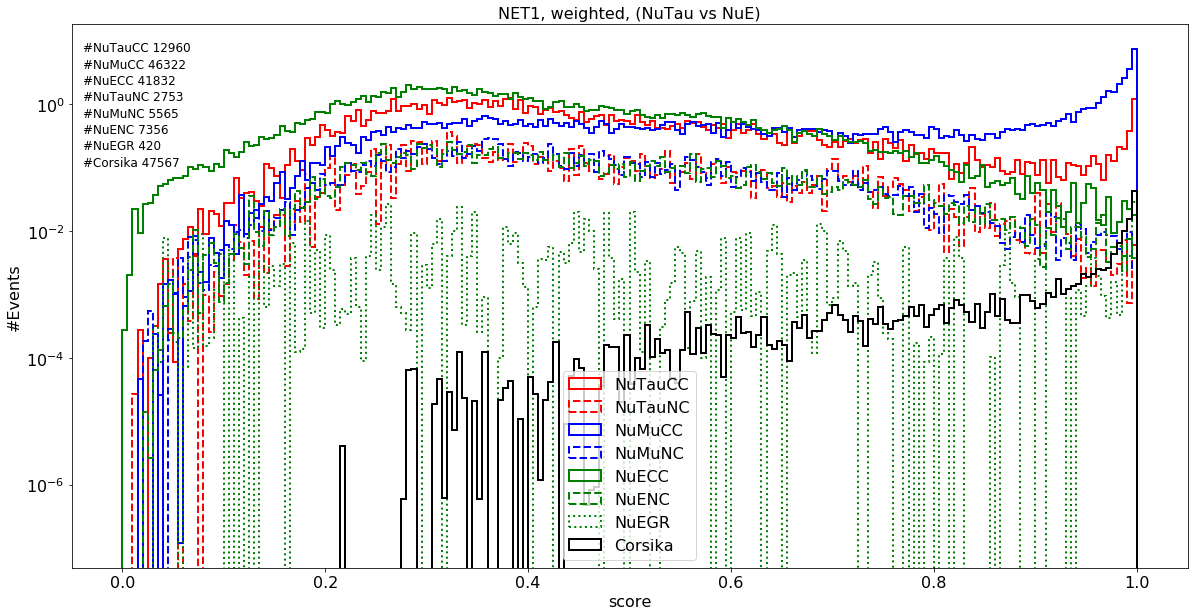

In [62]:
PlotW("NET1, weighted, (NuTau vs NuE)", "score", data_tc['preds']['n1'],data_tn['preds']['n1'],data_mc['preds']['n1'],\
      data_mn['preds']['n1'],data_ec['preds']['n1'],data_en['preds']['n1'],data_eg['preds']['n1'],data_c['preds']['n1'],\
      data_tc['weight_val'],data_tn['weight_val'],data_mc['weight_val'],data_mn['weight_val'],\
      data_ec['weight_val'],data_en['weight_val'],data_eg['weight_val'],data_c['weight_val'])
GetRates("Rates after NET1, Cut=0.99",0.99,"more","n1")

Rates after NET2, Cut=0.97
Total = 0.435 +/- 0.041
Single = 0.025 +/- 0.015
Double = 0.387 +/- 0.023
Track =  0.023 +/- 0.003
NuTauCC = 0.387 +/- 0.023
NuTauNC = 0.008 +/- 0.006
NuMuCC =  0.023 +/- 0.003
NuMuNC =  0.002 +/- 0.001
NuECC =   0.006 +/- 0.002
NuENC =   0.004 +/- 0.002
NuEGR =   0.005 +/- 0.005
Corsika =  0.000 +/- 0.000


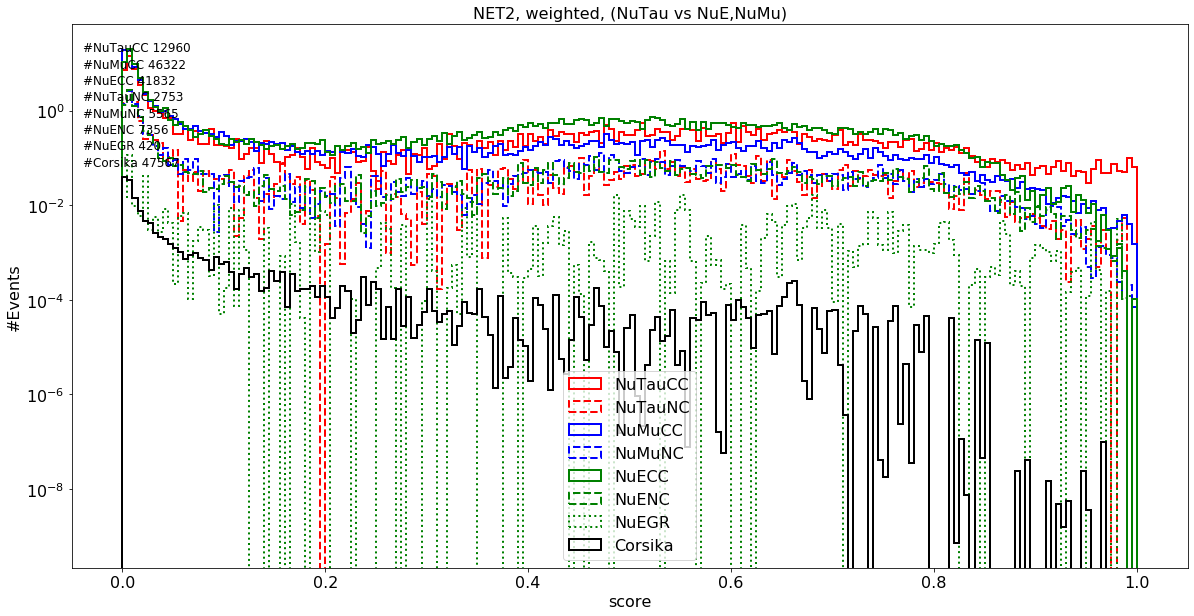

In [63]:
PlotW("NET2, weighted, (NuTau vs NuE,NuMu)", "score", data_tc['preds']['n2'],data_tn['preds']['n2'],data_mc['preds']['n2'],\
      data_mn['preds']['n2'],data_ec['preds']['n2'],data_en['preds']['n2'],data_eg['preds']['n2'],data_c['preds']['n2'],\
      data_tc['weight_val'],data_tn['weight_val'],data_mc['weight_val'],data_mn['weight_val'],\
      data_ec['weight_val'],data_en['weight_val'],data_eg['weight_val'],data_c['weight_val'])
GetRates("Rates after NET2, Cut=0.97",0.97,"more","n2")

Rates after NET3, Cut=0.8
Total = 45.269 +/- 1.065
Single = 4.317 +/- 0.358
Double = 6.068 +/- 0.245
Track =  34.884 +/- 0.463
NuTauCC = 6.068 +/- 0.245
NuTauNC = 0.757 +/- 0.096
NuMuCC =  34.762 +/- 0.460
NuMuNC =  0.835 +/- 0.078
NuECC =   1.820 +/- 0.098
NuENC =   0.834 +/- 0.073
NuEGR =   0.070 +/- 0.012
Corsika =  0.121 +/- 0.002


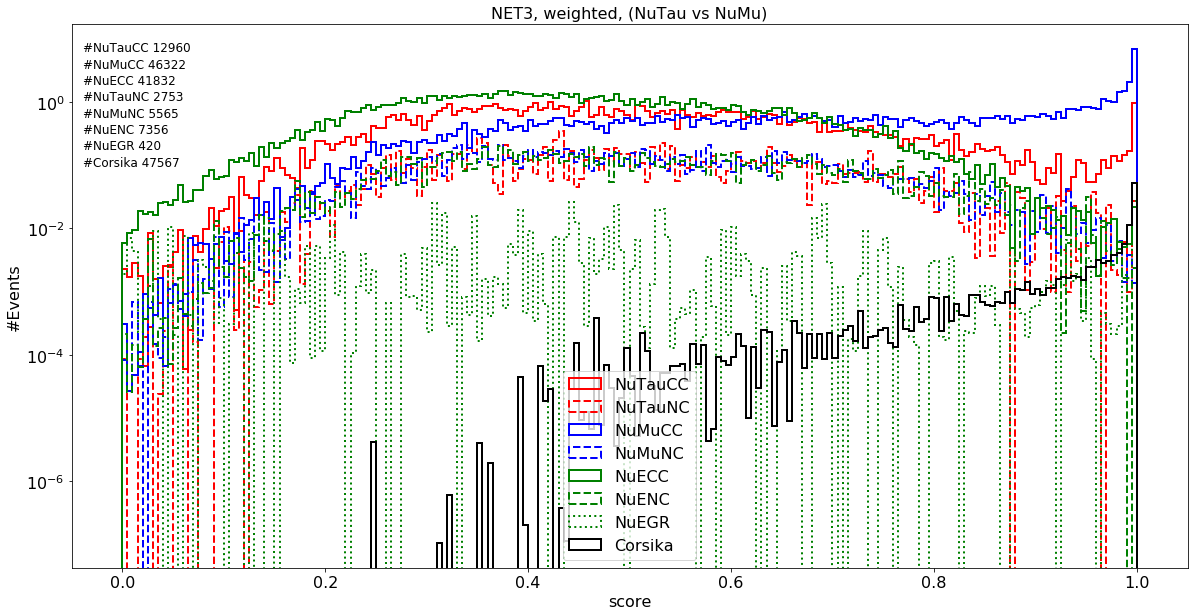

In [277]:
PlotW("NET3, weighted, (NuTau vs NuMu)", "score", data_tc['preds']['n3'],data_tn['preds']['n3'],data_mc['preds']['n3'],\
      data_mn['preds']['n3'],data_ec['preds']['n3'],data_en['preds']['n3'],data_eg['preds']['n3'],data_c['preds']['n3'],\
      data_tc['weight_val'],data_tn['weight_val'],data_mc['weight_val'],data_mn['weight_val'],\
      data_ec['weight_val'],data_en['weight_val'],data_eg['weight_val'],data_c['weight_val'])
GetRates("Rates after NET3, Cut=0.8",0.8,"more","n3")


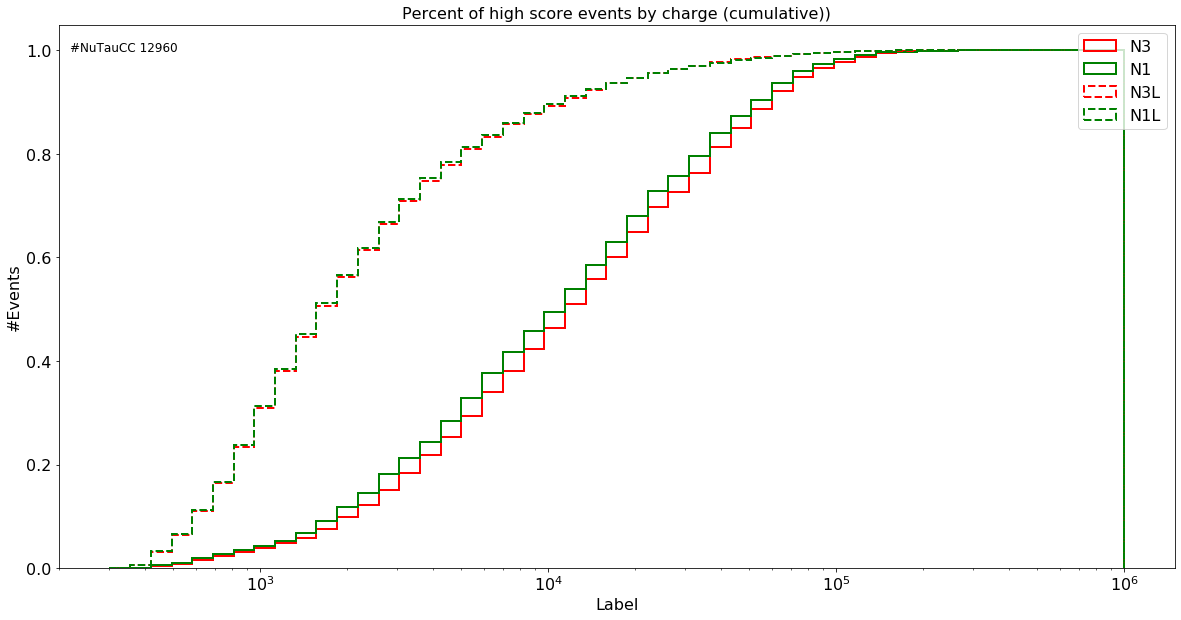

121


NameError: name 'mask_3' is not defined

In [14]:
cut =0.99
mask_n3 = data_tc['preds']['n3'] > cut
mask_n1 = data_tc['preds']['n1'] > cut
mask_n3l = data_tc['preds']['n3'] < cut
mask_n1l = data_tc['preds']['n1'] < cut

bins=np.logspace(np.log10(300),np.log10(10**6), 50)
fig = plt.figure(figsize=(20, 10),facecolor ='w')
ax = fig.add_subplot(111)
plt.rcParams.update({'font.size': 16})
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_xscale('log')
ax.set_yscale('linear')
ax.set_title("Percent of high score events by charge (cumulative))",fontsize = 16)
ax.text(0.01,0.95,'#NuTauCC '+str(len(data_tc)), transform=ax.transAxes, color = "black",fontsize=12)

ax.set_xlabel('Label', fontsize = 16)                                                              
ax.set_ylabel("#Events", fontsize = 16)                                                   
ax.hist(data_tc['qst']['q'][:,0][mask_n3],bins =bins,histtype = 'step',edgecolor ='r',lw =2, cumulative = 1, density = True,label = "N3")  
ax.hist(data_tc['qst']['q'][:,0][mask_n1],bins =bins,histtype = 'step',edgecolor ='g',lw =2, cumulative = 1, density = True,label = "N1")  
ax.hist(data_tc['qst']['q'][:,0][mask_n3l],bins =bins,histtype = 'step',edgecolor ='r',ls ="--",lw =2, cumulative = 1, density = True,label = "N3L")  
ax.hist(data_tc['qst']['q'][:,0][mask_n1l],bins =bins,histtype = 'step',edgecolor ='g',ls ="--",lw =2, cumulative = 1, density = True,label = "N1L")  
   
plt.legend()
plt.show()
print(sum(data_tc['qst']['q'][:,0][mask_n3] < 2000))
print(sum(data_tc['qst']['q'][:,0][mask_n3] < 2000)/len(data_tc['qst']['q'][:,0][mask_3]))
print(sum(data_tc['qst']['q'][:,0][mask_n1] < 2000))
print(sum(data_tc['qst']['q'][:,0][mask_n1] < 2000)/len(data_tc['qst']['q'][:,0][mask_1]))
print(sum(data_tc['qst']['q'][:,0][mask_n3l] < 2000))
print(sum(data_tc['qst']['q'][:,0][mask_n3l] < 2000)/len(data_tc['qst']['q'][:,0][mask_3l]))
print(sum(data_tc['qst']['q'][:,0][mask_n1l] < 2000))
print(sum(data_tc['qst']['q'][:,0][mask_n1l] < 2000)/len(data_tc['qst']['q'][:,0][mask_1l]))

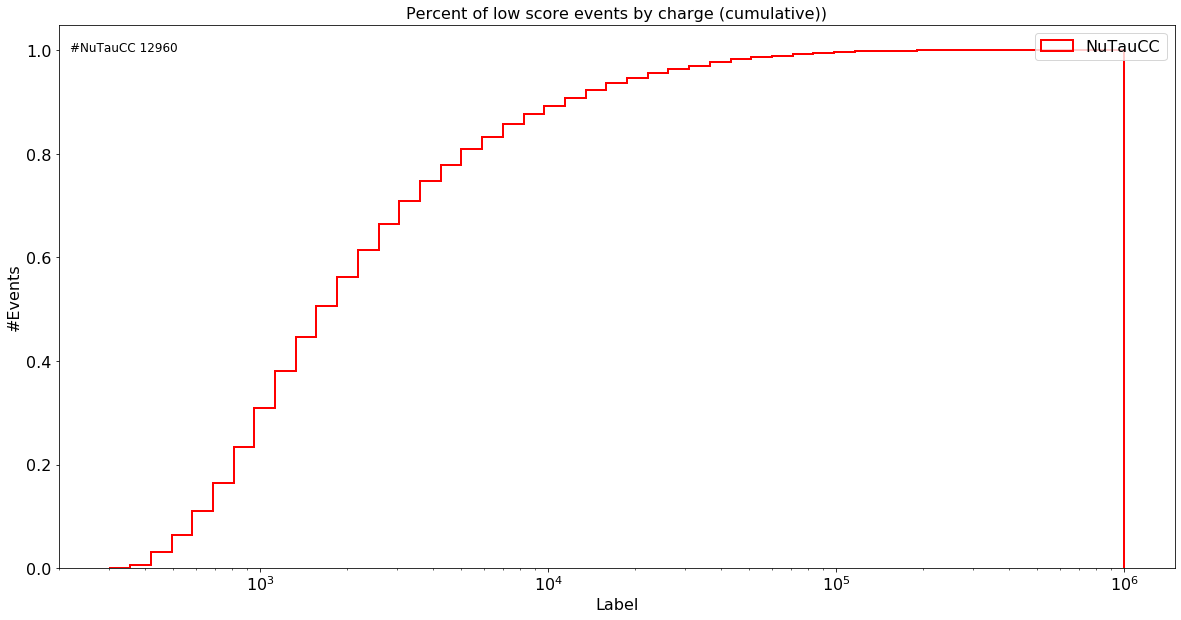

6126
0.5317246766773718


In [10]:
cut =0.99
mask = data_tc['preds']['n3'] < cut
bins=np.logspace(np.log10(300),np.log10(10**6), 50)
fig = plt.figure(figsize=(20, 10),facecolor ='w')
ax = fig.add_subplot(111)
plt.rcParams.update({'font.size': 16})
plt.ticklabel_format(axis='both', style='sci', scilimits=(-5,5))
ax.set_xscale('log')
ax.set_yscale('linear')
ax.set_title("Percent of low score events by charge (cumulative))",fontsize = 16)
ax.text(0.01,0.95,'#NuTauCC '+str(len(data_tc)), transform=ax.transAxes, color = "black",fontsize=12)

ax.set_xlabel('Label', fontsize = 16)                                                              
ax.set_ylabel("#Events", fontsize = 16)                                                   
ax.hist(data_tc['qst']['q'][:,0][mask],bins =bins,histtype = 'step',edgecolor ='r',lw =2, cumulative = 1, density = True,label = "NuTauCC")  
   
plt.legend()
plt.show()
print(sum(data_tc['qst']['q'][:,0][mask] < 2000))
print(sum(data_tc['qst']['q'][:,0][mask] < 2000)/len(data_tc['qst']['q'][:,0][mask]))

Rates after NET3, Cut=0.8
Total = 111.044 +/- 2.320
Single = 68.403 +/- 1.329
Double = 32.591 +/- 0.710
Track =  10.050 +/- 0.280
NuTauCC = 32.591 +/- 0.710
NuTauNC = 5.430 +/- 0.264
NuMuCC =  10.049 +/- 0.280
NuMuNC =  5.670 +/- 0.199
NuECC =   51.301 +/- 0.632
NuENC =   5.727 +/- 0.189
NuEGR =   0.276 +/- 0.045
Corsika =  0.000 +/- 0.000


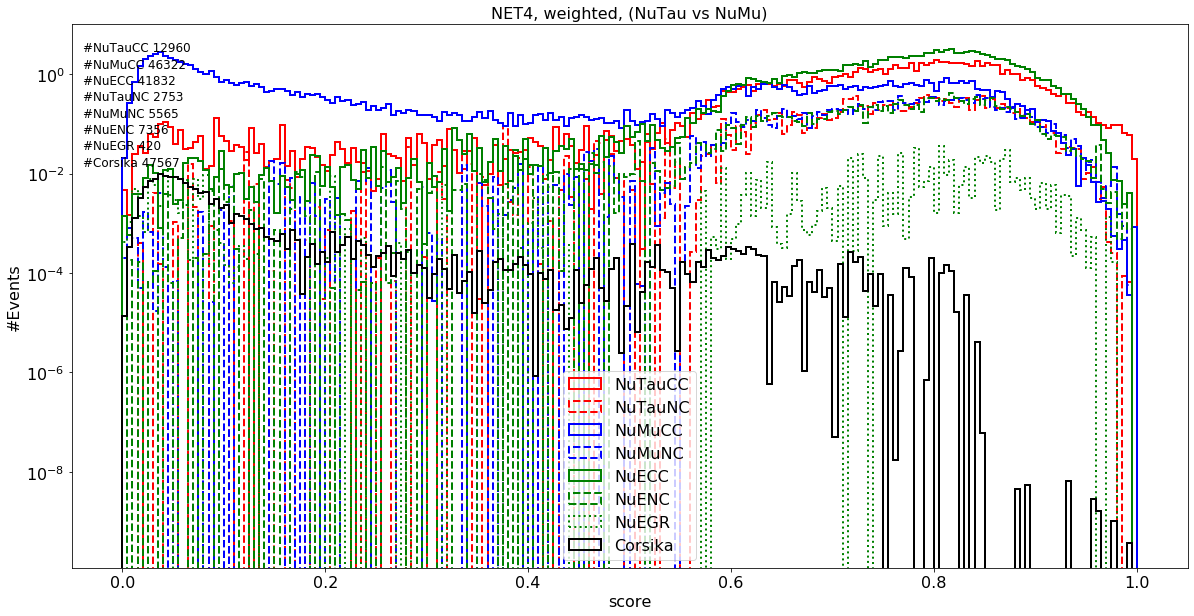

In [65]:
PlotW("NET4, weighted, (NuTau vs NuMu)", "score", data_tc['preds']['n4'],data_tn['preds']['n4'],data_mc['preds']['n4'],\
      data_mn['preds']['n4'],data_ec['preds']['n4'],data_en['preds']['n4'],data_eg['preds']['n4'],data_c['preds']['n4'],\
      data_tc['weight_val'],data_tn['weight_val'],data_mc['weight_val'],data_mn['weight_val'],\
      data_ec['weight_val'],data_en['weight_val'],data_eg['weight_val'],data_c['weight_val'])
GetRates("Rates after NET3, Cut=0.8",0.8,"more","n4")

No empty events

In [271]:
print(ne_mask_tc.shape)

(12960,)


In [272]:
ne1_mask_tc = data_tc['im_sum'][:,0]!=0
ne1_mask_tn = data_tn['im_sum'][:,0]!=0
ne1_mask_mc = data_mc['im_sum'][:,0]!=0
ne1_mask_mn = data_mn['im_sum'][:,0]!=0 
ne1_mask_ec = data_ec['im_sum'][:,0]!=0 
ne1_mask_en = data_en['im_sum'][:,0]!=0 
ne1_mask_eg = data_eg['im_sum'][:,0]!=0 
ne1_mask_c  = data_c['im_sum'][:,0]!=0

ne2_mask_tc = data_tc['im_sum'][:,1]!=0
ne2_mask_tn = data_tn['im_sum'][:,1]!=0
ne2_mask_mc = data_mc['im_sum'][:,1]!=0
ne2_mask_mn = data_mn['im_sum'][:,1]!=0 
ne2_mask_ec = data_ec['im_sum'][:,1]!=0 
ne2_mask_en = data_en['im_sum'][:,1]!=0 
ne2_mask_eg = data_eg['im_sum'][:,1]!=0 
ne2_mask_c  = data_c['im_sum'][:,1]!=0

ne3_mask_tc = data_tc['im_sum'][:,2]!=0
ne3_mask_tn = data_tn['im_sum'][:,2]!=0
ne3_mask_mc = data_mc['im_sum'][:,2]!=0
ne3_mask_mn = data_mn['im_sum'][:,2]!=0 
ne3_mask_ec = data_ec['im_sum'][:,2]!=0 
ne3_mask_en = data_en['im_sum'][:,2]!=0 
ne3_mask_eg = data_eg['im_sum'][:,2]!=0 
ne3_mask_c  = data_c['im_sum'][:,2]!=0

ne_mask_tc = ne1_mask_tc & ne2_mask_tc & ne3_mask_tc 
ne_mask_tn = ne1_mask_tn & ne2_mask_tn & ne3_mask_tn 
ne_mask_mc = ne1_mask_mc & ne2_mask_mc & ne3_mask_mc 
ne_mask_mn = ne1_mask_mn & ne2_mask_mn & ne3_mask_mn  
ne_mask_ec = ne1_mask_ec & ne2_mask_ec & ne3_mask_ec  
ne_mask_en = ne1_mask_en & ne2_mask_en & ne3_mask_en  
ne_mask_eg = ne1_mask_eg & ne2_mask_eg & ne3_mask_eg  
ne_mask_c = ne1_mask_c & ne2_mask_c & ne3_mask_c 


In [273]:
data_n1_s = np.concatenate((data_ec['preds']['n1'], data_tn['preds']['n1'],data_en['preds']['n1'],data_mn['preds']['n1'],data_eg['preds']['n1']), axis=0)
data_n1_t = np.concatenate((data_mc['preds']['n1'],data_c['preds']['n1']), axis=0)
data_n1_d = data_tc['preds']['n1']
data_n2_s = np.concatenate((data_ec['preds']['n2'], data_tn['preds']['n2'],data_en['preds']['n2'],data_mn['preds']['n2'],data_eg['preds']['n2']), axis=0)
data_n2_t = np.concatenate((data_mc['preds']['n2'],data_c['preds']['n2']), axis=0)
data_n2_d = data_tc['preds']['n2']
#data_n3_s = np.concatenate((data_ec['preds']['n3'], data_tn['preds']['n3'],data_en['preds']['n3'],data_mn['preds']['n3'],data_eg['preds']['n3']), axis=0)
#data_n3_t = np.concatenate((data_mc['preds']['n3'],data_c['preds']['n3']), axis=0)
#data_n3_d = data_tc['preds']['n3']
data_n3_s = np.concatenate((data_ec['preds']['n4'], data_tn['preds']['n4'],data_en['preds']['n4'],data_mn['preds']['n4'],data_eg['preds']['n4']), axis=0)
data_n3_t = np.concatenate((data_mc['preds']['n4'],data_c['preds']['n4']), axis=0)
data_n3_d = data_tc['preds']['n4']

In [274]:
ne_data_n1_s = np.concatenate((data_ec['preds']['n1'][ne_mask_ec],data_tn['preds']['n1'][ne_mask_tn],\
                            data_en['preds']['n1'][ne_mask_en],data_mn['preds']['n1'][ne_mask_mn],\
                            data_eg['preds']['n1'][ne_mask_eg]), axis=0)
ne_data_n1_t = np.concatenate((data_mc['preds']['n1'][ne_mask_mc],data_c['preds']['n1'][ne_mask_c]), axis=0)
ne_data_n1_d = data_tc['preds']['n1'][ne_mask_tc]
ne_data_n3_s = np.concatenate((data_ec['preds']['n4'][ne_mask_ec],data_tn['preds']['n4'][ne_mask_tn],\
                              data_en['preds']['n4'][ne_mask_en],data_mn['preds']['n4'][ne_mask_mn],\
                              data_eg['preds']['n4'][ne_mask_eg]), axis=0)
ne_data_n3_t = np.concatenate((data_mc['preds']['n4'][ne_mask_mc],data_c['preds']['n4'][ne_mask_c]), axis=0)
ne_data_n3_d = data_tc['preds']['n4'][ne_mask_tc]

ne1_data_n1_s = np.concatenate((data_ec['preds']['n1'][ne1_mask_ec],data_tn['preds']['n1'][ne1_mask_tn],\
                            data_en['preds']['n1'][ne1_mask_en],data_mn['preds']['n1'][ne1_mask_mn],\
                            data_eg['preds']['n1'][ne1_mask_eg]), axis=0)
ne1_data_n1_t = np.concatenate((data_mc['preds']['n1'][ne1_mask_mc],data_c['preds']['n1'][ne1_mask_c]), axis=0)
ne1_data_n1_d = data_tc['preds']['n1'][ne1_mask_tc]
ne1_data_n3_s = np.concatenate((data_ec['preds']['n4'][ne1_mask_ec],data_tn['preds']['n4'][ne1_mask_tn],\
                              data_en['preds']['n4'][ne1_mask_en],data_mn['preds']['n4'][ne1_mask_mn],\
                              data_eg['preds']['n4'][ne1_mask_eg]), axis=0)
ne1_data_n3_t = np.concatenate((data_mc['preds']['n4'][ne1_mask_mc],data_c['preds']['n4'][ne1_mask_c]), axis=0)
ne1_data_n3_d = data_tc['preds']['n4'][ne1_mask_tc]

ne2_data_n1_s = np.concatenate((data_ec['preds']['n1'][ne2_mask_ec],data_tn['preds']['n1'][ne2_mask_tn],\
                            data_en['preds']['n1'][ne2_mask_en],data_mn['preds']['n1'][ne2_mask_mn],\
                            data_eg['preds']['n1'][ne2_mask_eg]), axis=0)
ne2_data_n1_t = np.concatenate((data_mc['preds']['n1'][ne2_mask_mc],data_c['preds']['n1'][ne2_mask_c]), axis=0)
ne2_data_n1_d = data_tc['preds']['n1'][ne2_mask_tc]
ne2_data_n3_s = np.concatenate((data_ec['preds']['n4'][ne2_mask_ec],data_tn['preds']['n4'][ne2_mask_tn],\
                              data_en['preds']['n4'][ne2_mask_en],data_mn['preds']['n4'][ne2_mask_mn],\
                              data_eg['preds']['n4'][ne2_mask_eg]), axis=0)
ne2_data_n3_t = np.concatenate((data_mc['preds']['n4'][ne2_mask_mc],data_c['preds']['n4'][ne2_mask_c]), axis=0)
ne2_data_n3_d = data_tc['preds']['n4'][ne2_mask_tc]

ne3_data_n1_s = np.concatenate((data_ec['preds']['n1'][ne3_mask_ec],data_tn['preds']['n1'][ne3_mask_tn],\
                            data_en['preds']['n1'][ne3_mask_en],data_mn['preds']['n1'][ne3_mask_mn],\
                            data_eg['preds']['n1'][ne3_mask_eg]), axis=0)
ne3_data_n1_t = np.concatenate((data_mc['preds']['n1'][ne3_mask_mc],data_c['preds']['n1'][ne3_mask_c]), axis=0)
ne3_data_n1_d = data_tc['preds']['n1'][ne3_mask_tc]
ne3_data_n3_s = np.concatenate((data_ec['preds']['n4'][ne3_mask_ec],data_tn['preds']['n4'][ne3_mask_tn],\
                              data_en['preds']['n4'][ne3_mask_en],data_mn['preds']['n4'][ne3_mask_mn],\
                              data_eg['preds']['n4'][ne3_mask_eg]), axis=0)
ne3_data_n3_t = np.concatenate((data_mc['preds']['n4'][ne3_mask_mc],data_c['preds']['n4'][ne3_mask_c]), axis=0)
ne3_data_n3_d = data_tc['preds']['n4'][ne3_mask_tc]

In [67]:
w_s = np.concatenate((data_ec['weight_val'], data_tn['weight_val'],data_en['weight_val'],data_mn['weight_val'],\
                         data_eg['weight_val']), axis=0)
w_t = np.concatenate((data_mc['weight_val'],data_c['weight_val']), axis=0)
w_d = data_tc['weight_val']

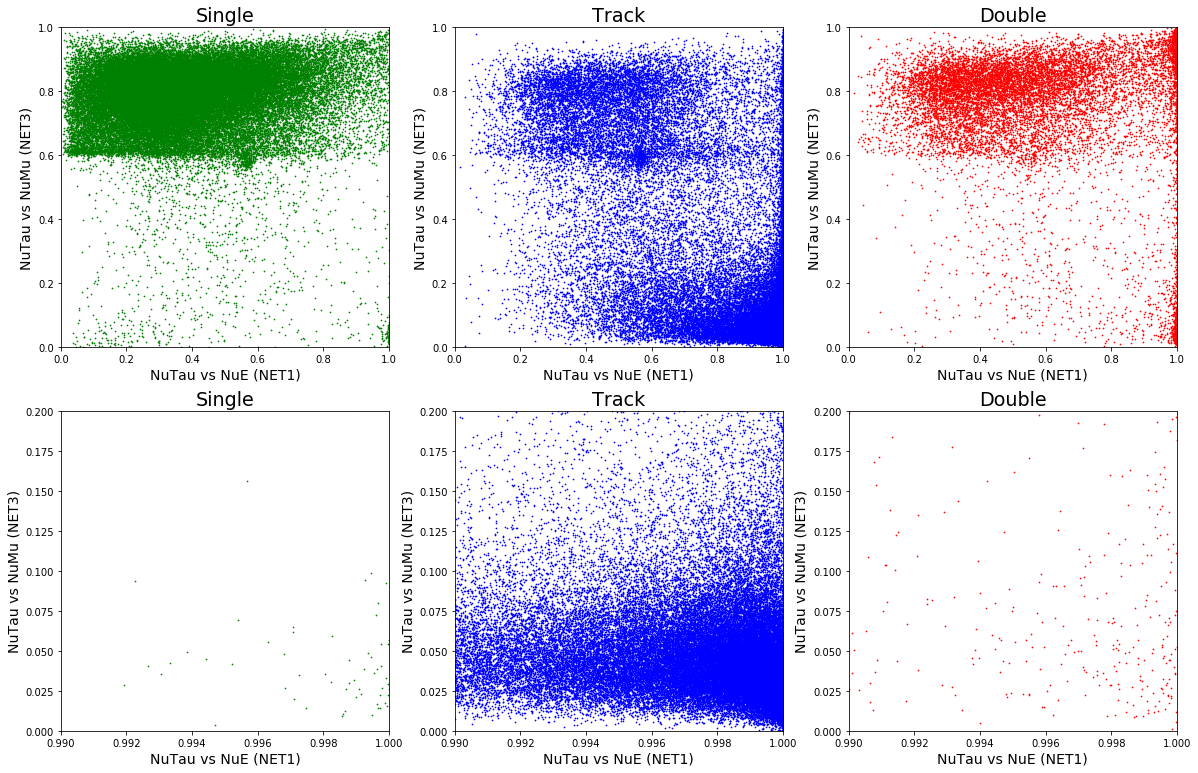

In [266]:
l1 = [0.,1]
l2 = [0.99,1]
l3 = [0,0.2]
fig, ax = plt.subplots(nrows=2, ncols=3,sharex = True,sharey=True, figsize=(20,20),facecolor ='w')
plt.title('Network scores', fontdict={'fontsize': 14, 'fontweight': 'medium'})

plt.subplot(3,3,1)
ax = plt.gca()
ax.set_xlim(l1)
ax.set_ylim(l1)
ax.set_title('Single')
plt.scatter(data_n1_s,data_n3_s, c = 'g', s =0.5)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_s)), color = "k",fontsize=12)
plt.xlabel("NuTau vs NuE (NET1)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NuTau vs NuMu (NET3)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

plt.subplot(3,3,2)
ax = plt.gca()
ax.set_xlim(l1)
ax.set_ylim(l1)
ax.set_title('Track')
plt.scatter(data_n1_t,data_n3_t, c = 'b', s =0.5)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_t)), color = "k",fontsize=12)
plt.xlabel("NuTau vs NuE (NET1)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NuTau vs NuMu (NET3)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

plt.subplot(3,3,3)
ax = plt.gca()
ax.set_xlim(l1)
ax.set_ylim(l1)
ax.set_title('Double')
plt.scatter(data_n1_d,data_n3_d, c = 'r', s =0.5)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_d)), color = "k",fontsize=12)
plt.xlabel("NuTau vs NuE (NET1)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NuTau vs NuMu (NET3)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

plt.subplot(3,3,4)
ax = plt.gca()
ax.set_xlim(l2)
ax.set_ylim(l3)
ax.set_title('Single')
plt.scatter(data_n1_s,data_n3_s, c = 'g', s =0.5)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_s)), color = "k",fontsize=12)
plt.xlabel("NuTau vs NuE (NET1)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NuTau vs NuMu (NET3)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

plt.subplot(3,3,5)
ax = plt.gca()
ax.set_xlim(l2)
ax.set_ylim(l3)
ax.set_title('Track')
plt.scatter(data_n1_t,data_n3_t, c = 'b', s =0.5)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_t)), color = "k",fontsize=12)
plt.xlabel("NuTau vs NuE (NET1)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NuTau vs NuMu (NET3)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

plt.subplot(3,3,6)
ax = plt.gca()
ax.set_xlim(l2)
ax.set_ylim(l3)
ax.set_title('Double')
plt.scatter(data_n1_d,data_n3_d, c = 'r', s =0.5)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_d)), color = "k",fontsize=12)
plt.xlabel("NuTau vs NuE (NET1)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NuTau vs NuMu (NET3)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

# plt.subplot(3,3,7)
# ax = plt.gca()
# ax.set_xlim(l2)
# ax.set_ylim(l3)
# ax.set_title('Single')
# plt.scatter(data_n1_s,data_n3_s, c = 'g', s =0.5)
# #plt.text(0.05,0.95,'All events = '+str(len(data_n1_s)), color = "k",fontsize=12)
# plt.xlabel("NuTau vs NuE (NET1)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
# plt.ylabel("NuTau vs NuMu (NET3)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
# ax.tick_params(axis='both', which='major', labelsize=10)
# ax.tick_params(axis='both', which='minor', labelsize=8)

# plt.subplot(3,3,8)
# ax = plt.gca()
# ax.set_xlim(l2)
# ax.set_ylim(l3)
# ax.set_title('Track')
# plt.scatter(data_n1_t,data_n3_t, c = 'b', s =0.5)
# #plt.text(0.05,0.95,'All events = '+str(len(data_n1_t)), color = "k",fontsize=12)
# plt.xlabel("NuTau vs NuE (NET1)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
# plt.ylabel("NuTau vs NuMu (NET3)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
# ax.tick_params(axis='both', which='major', labelsize=10)
# ax.tick_params(axis='both', which='minor', labelsize=8)

# plt.subplot(3,3,9)
# ax = plt.gca()
# ax.set_xlim(l2)
# ax.set_ylim(l3)
# ax.set_title('Double')
# plt.scatter(data_n1_d,data_n3_d, c = 'r', s =0.5)
# #plt.text(0.05,0.95,'All events = '+str(len(data_n1_d)), color = "k",fontsize=12)
# plt.xlabel("NuTau vs NuE (NET1)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
# plt.ylabel("NuTau vs NuMu (NET3)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
# ax.tick_params(axis='both', which='major', labelsize=10)
# ax.tick_params(axis='both', which='minor', labelsize=8)

plt.show()

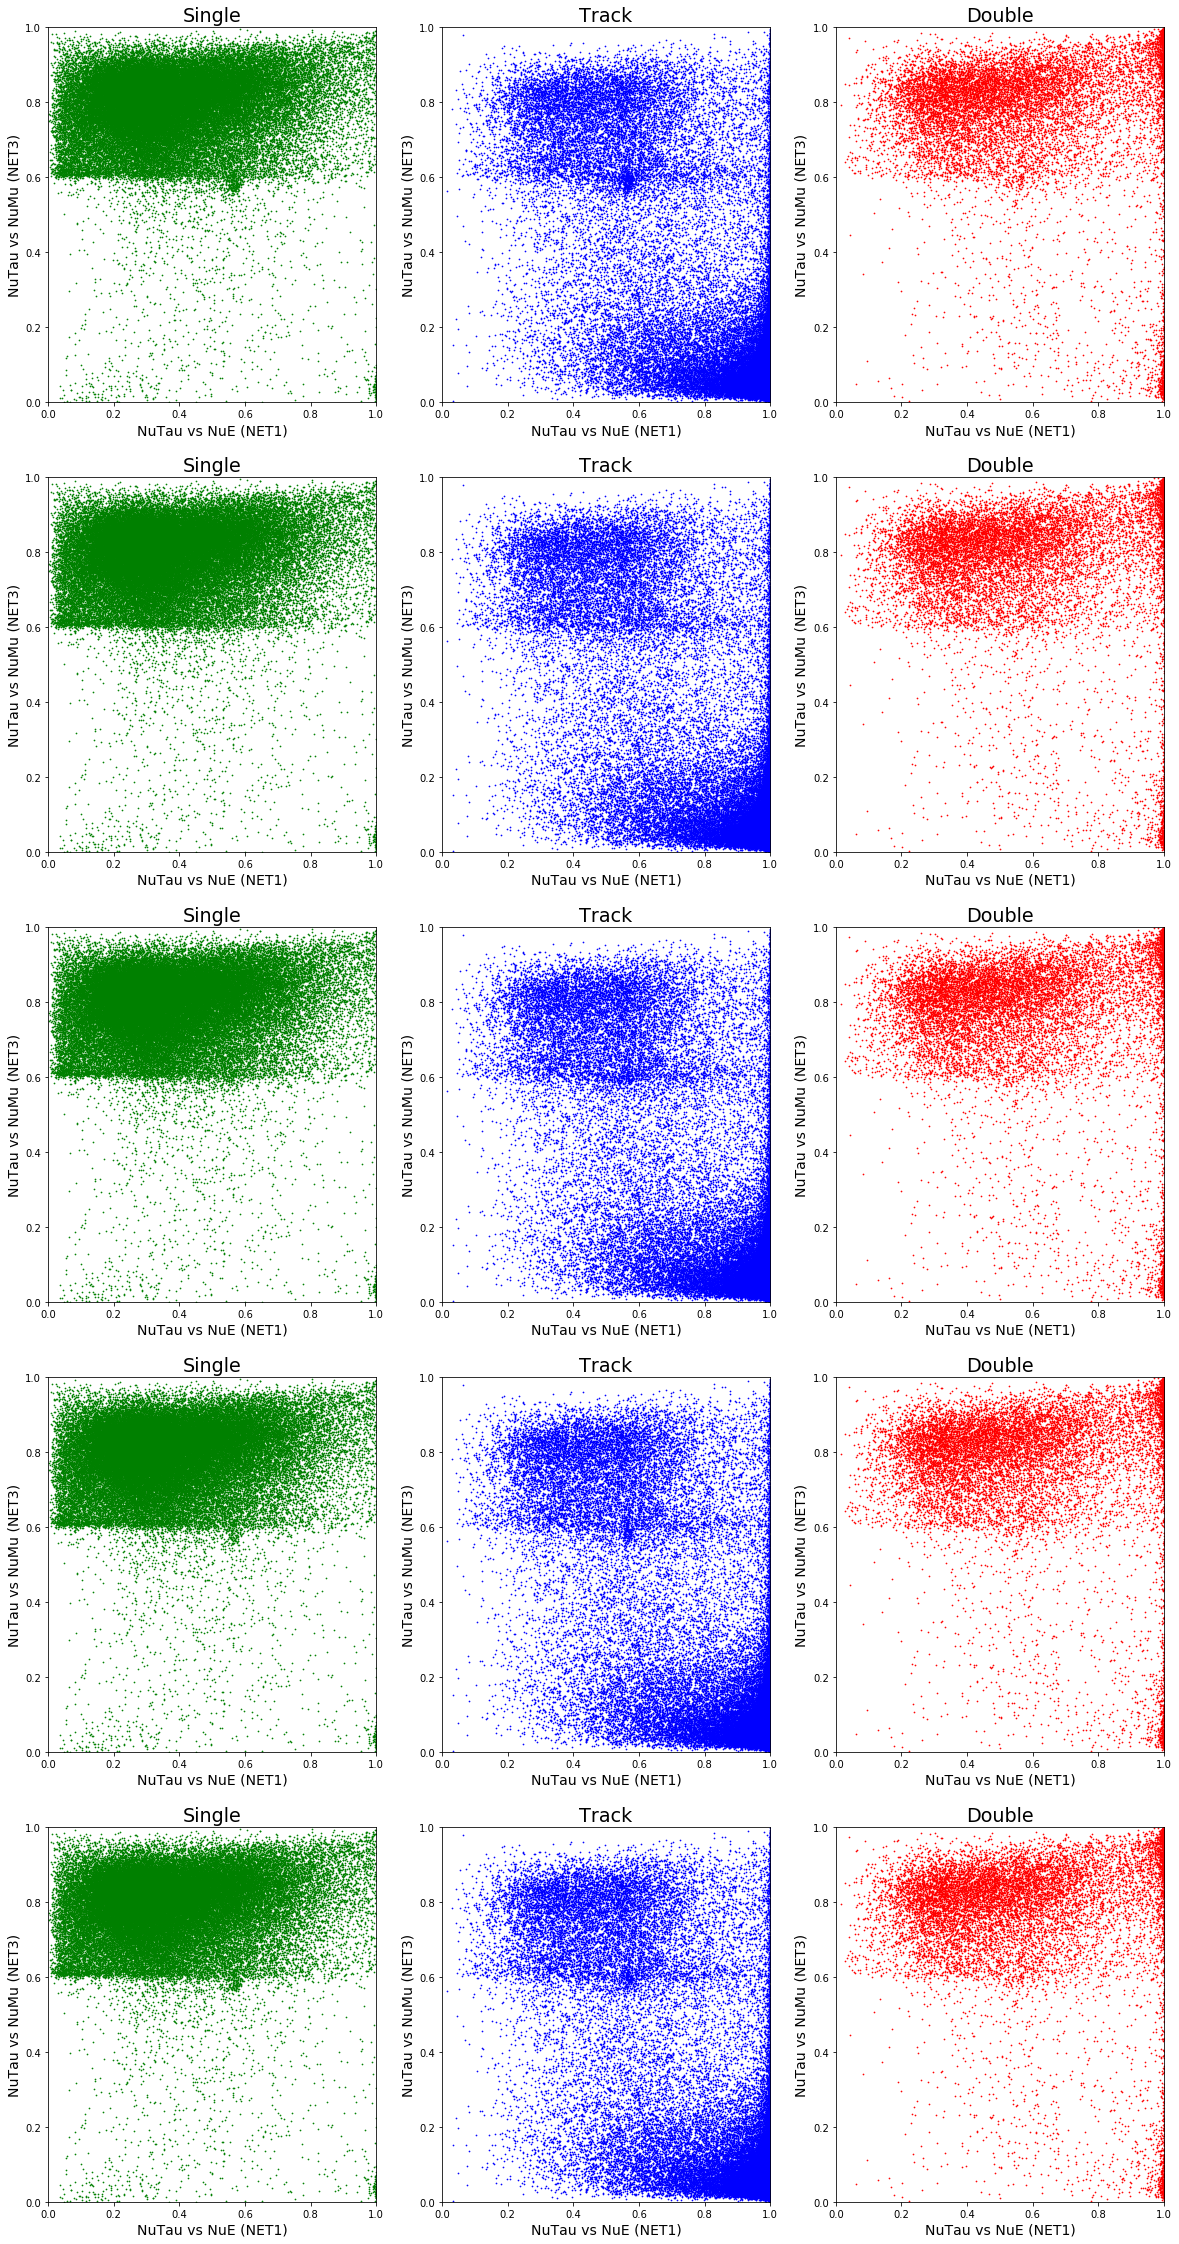

In [275]:
l1 = [0.,1]
l2 = [0.99,1]
l3 = [0,0.2]
fig, ax = plt.subplots(nrows=5, ncols=3,sharex = True,sharey=True, figsize=(20,40),facecolor ='w')
plt.title('Network scores without empty events', fontdict={'fontsize': 14, 'fontweight': 'medium'})

plt.subplot(5,3,1)
ax = plt.gca()
ax.set_xlim(l1)
ax.set_ylim(l1)
ax.set_title('Single')
plt.scatter(data_n1_s,data_n3_s, c = 'g', s =0.5)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_s)), color = "k",fontsize=12)
plt.xlabel("NuTau vs NuE (NET1)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NuTau vs NuMu (NET3)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

plt.subplot(5,3,2)
ax = plt.gca()
ax.set_xlim(l1)
ax.set_ylim(l1)
ax.set_title('Track')
plt.scatter(data_n1_t,data_n3_t, c = 'b', s =0.5)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_t)), color = "k",fontsize=12)
plt.xlabel("NuTau vs NuE (NET1)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NuTau vs NuMu (NET3)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

plt.subplot(5,3,3)
ax = plt.gca()
ax.set_xlim(l1)
ax.set_ylim(l1)
ax.set_title('Double')
plt.scatter(data_n1_d,data_n3_d, c = 'r', s =0.5)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_d)), color = "k",fontsize=12)
plt.xlabel("NuTau vs NuE (NET1)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NuTau vs NuMu (NET3)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

plt.subplot(5,3,4)
ax = plt.gca()
ax.set_xlim(l1)
ax.set_ylim(l1)
ax.set_title('Single')
plt.scatter(ne_data_n1_s,ne_data_n3_s, c = 'g', s =0.5)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_s)), color = "k",fontsize=12)
plt.xlabel("NuTau vs NuE (NET1)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NuTau vs NuMu (NET3)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

plt.subplot(5,3,5)
ax = plt.gca()
ax.set_xlim(l1)
ax.set_ylim(l1)
ax.set_title('Track')
plt.scatter(ne_data_n1_t,ne_data_n3_t, c = 'b', s =0.5)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_t)), color = "k",fontsize=12)
plt.xlabel("NuTau vs NuE (NET1)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NuTau vs NuMu (NET3)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

plt.subplot(5,3,6)
ax = plt.gca()
ax.set_xlim(l1)
ax.set_ylim(l1)
ax.set_title('Double')
plt.scatter(ne_data_n1_d,ne_data_n3_d, c = 'r', s =0.5)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_d)), color = "k",fontsize=12)
plt.xlabel("NuTau vs NuE (NET1)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NuTau vs NuMu (NET3)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

plt.subplot(5,3,7)
ax = plt.gca()
ax.set_xlim(l1)
ax.set_ylim(l1)
ax.set_title('Single')
plt.scatter(ne1_data_n1_s,ne1_data_n3_s, c = 'g', s =0.5)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_s)), color = "k",fontsize=12)
plt.xlabel("NuTau vs NuE (NET1)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NuTau vs NuMu (NET3)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

plt.subplot(5,3,8)
ax = plt.gca()
ax.set_xlim(l1)
ax.set_ylim(l1)
ax.set_title('Track')
plt.scatter(ne1_data_n1_t,ne1_data_n3_t, c = 'b', s =0.5)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_t)), color = "k",fontsize=12)
plt.xlabel("NuTau vs NuE (NET1)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NuTau vs NuMu (NET3)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

plt.subplot(5,3,9)
ax = plt.gca()
ax.set_xlim(l1)
ax.set_ylim(l1)
ax.set_title('Double')
plt.scatter(ne1_data_n1_d,ne1_data_n3_d, c = 'r', s =0.5)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_d)), color = "k",fontsize=12)
plt.xlabel("NuTau vs NuE (NET1)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NuTau vs NuMu (NET3)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

plt.subplot(5,3,10)
ax = plt.gca()
ax.set_xlim(l1)
ax.set_ylim(l1)
ax.set_title('Single')
plt.scatter(ne2_data_n1_s,ne2_data_n3_s, c = 'g', s =0.5)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_s)), color = "k",fontsize=12)
plt.xlabel("NuTau vs NuE (NET1)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NuTau vs NuMu (NET3)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

plt.subplot(5,3,11)
ax = plt.gca()
ax.set_xlim(l1)
ax.set_ylim(l1)
ax.set_title('Track')
plt.scatter(ne2_data_n1_t,ne2_data_n3_t, c = 'b', s =0.5)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_t)), color = "k",fontsize=12)
plt.xlabel("NuTau vs NuE (NET1)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NuTau vs NuMu (NET3)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

plt.subplot(5,3,12)
ax = plt.gca()
ax.set_xlim(l1)
ax.set_ylim(l1)
ax.set_title('Double')
plt.scatter(ne2_data_n1_d,ne2_data_n3_d, c = 'r', s =0.5)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_d)), color = "k",fontsize=12)
plt.xlabel("NuTau vs NuE (NET1)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NuTau vs NuMu (NET3)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

plt.subplot(5,3,13)
ax = plt.gca()
ax.set_xlim(l1)
ax.set_ylim(l1)
ax.set_title('Single')
plt.scatter(ne3_data_n1_s,ne3_data_n3_s, c = 'g', s =0.5)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_s)), color = "k",fontsize=12)
plt.xlabel("NuTau vs NuE (NET1)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NuTau vs NuMu (NET3)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

plt.subplot(5,3,14)
ax = plt.gca()
ax.set_xlim(l1)
ax.set_ylim(l1)
ax.set_title('Track')
plt.scatter(ne3_data_n1_t,ne3_data_n3_t, c = 'b', s =0.5)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_t)), color = "k",fontsize=12)
plt.xlabel("NuTau vs NuE (NET1)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NuTau vs NuMu (NET3)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)

plt.subplot(5,3,15)
ax = plt.gca()
ax.set_xlim(l1)
ax.set_ylim(l1)
ax.set_title('Double')
plt.scatter(ne3_data_n1_d,ne3_data_n3_d, c = 'r', s =0.5)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_d)), color = "k",fontsize=12)
plt.xlabel("NuTau vs NuE (NET1)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NuTau vs NuMu (NET3)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)



plt.show()

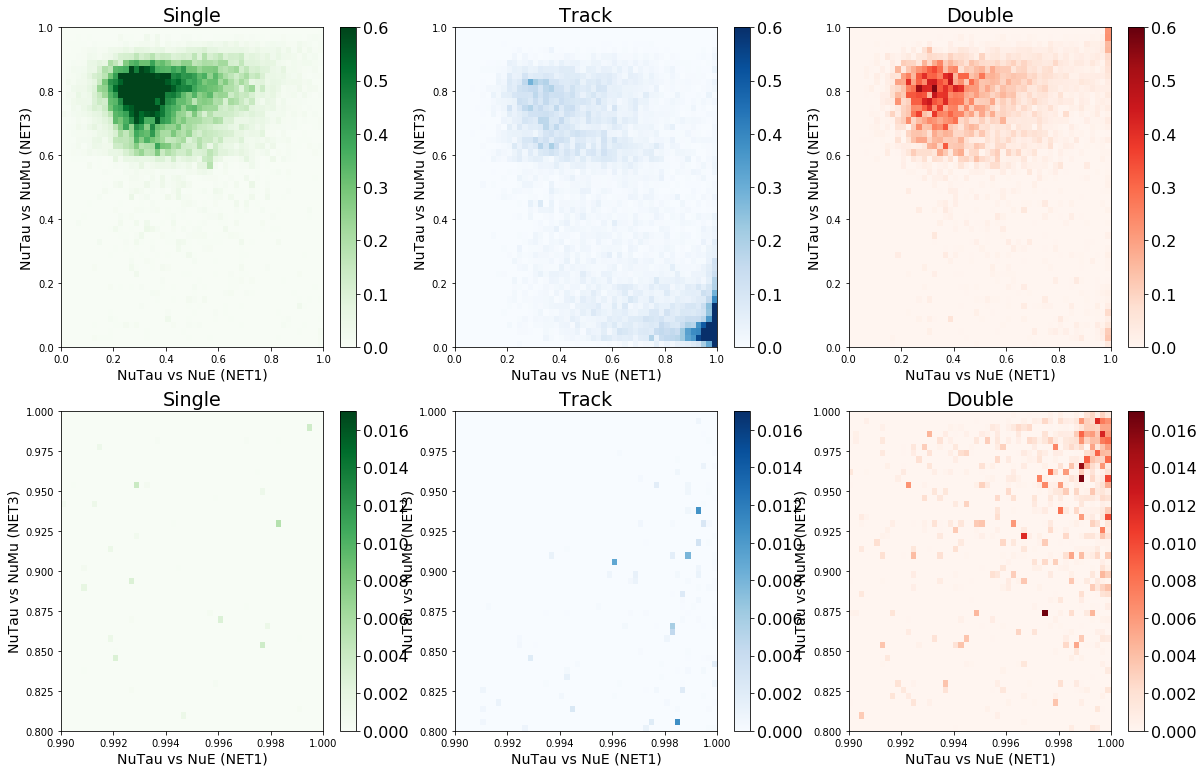

In [69]:
from matplotlib import ticker
fig, ax = plt.subplots(nrows=2, ncols=3,sharex = True,sharey=True, figsize=(20,20),facecolor ='w')
plt.title('Network scores', fontdict={'fontsize': 14, 'fontweight': 'medium'})

plt.subplot(3,3,1)
ax = plt.gca()
ax.set_title('Single')
plt.hist2d(data_n1_s,data_n3_s, weights = w_s, bins = 50, range = [[0,1],[0,1]], vmax = 0.6,cmap = 'Greens')
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_s)), color = "k",fontsize=12)
plt.xlabel("NuTau vs NuE (NET1)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NuTau vs NuMu (NET3)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)
plt.colorbar()

plt.subplot(3,3,2)
ax = plt.gca()
ax.set_title('Track')
plt.hist2d(data_n1_t,data_n3_t, weights = w_t, bins = 50, range = [[0,1],[0,1]] ,cmap = 'Blues', vmax = 0.6)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_t)), color = "k",fontsize=12)
plt.xlabel("NuTau vs NuE (NET1)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NuTau vs NuMu (NET3)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)
plt.colorbar()

plt.subplot(3,3,3)
ax = plt.gca()
ax.set_title('Double')
plt.hist2d(data_n1_d,data_n3_d, weights = w_d, bins = 50, range = [[0,1],[0,1]] ,cmap = 'Reds', vmax = 0.6)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_d)), color = "k",fontsize=12)
plt.xlabel("NuTau vs NuE (NET1)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NuTau vs NuMu (NET3)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)
plt.colorbar()

plt.subplot(3,3,4)
ax = plt.gca()
ax.set_title('Single')
plt.hist2d(data_n1_s,data_n3_s, weights = w_s,bins = 50, range = [[0.99,1],[0.8,1]] ,cmap = 'Greens', vmax = 0.017)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_s)), color = "k",fontsize=12)
plt.xlabel("NuTau vs NuE (NET1)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NuTau vs NuMu (NET3)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)
plt.colorbar()

plt.subplot(3,3,5)
ax = plt.gca()
ax.set_title('Track')
plt.hist2d(data_n1_t,data_n3_t, weights = w_t,bins = 50, range = [[0.99,1],[0.8,1]] ,cmap = 'Blues', vmax = 0.017)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_t)), color = "k",fontsize=12)
plt.xlabel("NuTau vs NuE (NET1)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NuTau vs NuMu (NET3)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)
plt.colorbar()

plt.subplot(3,3,6)
ax = plt.gca()
ax.set_title('Double')
h = plt.hist2d(data_n1_d,data_n3_d, weights = w_d,bins = 50, range = [[0.99,1],[0.8,1]] ,cmap = 'Reds', vmax = 0.017)
#plt.text(0.05,0.95,'All events = '+str(len(data_n1_d)), color = "k",fontsize=12)
plt.xlabel("NuTau vs NuE (NET1)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
plt.ylabel("NuTau vs NuMu (NET3)",  fontdict={'fontsize': 14, 'fontweight': 'medium'})
ax.tick_params(axis='both', which='major', labelsize=10)
ax.tick_params(axis='both', which='minor', labelsize=8)
plt.colorbar()
plt.show()

In [10]:
GetRates2("Rates after NET1 and NET3",0.99,0.8,"n1","n4","more","more")

Rates after NET1 and NET3
Total = 1.062 +/- 0.093
Single = 0.042 +/- 0.020
Double = 0.911 +/- 0.050
Track =  0.109 +/- 0.022
NuTauCC = 0.911 +/- 0.050
NuTauNC = 0.006 +/- 0.005
NuMuCC =  0.109 +/- 0.022
NuMuNC =  0.003 +/- 0.002
NuECC =   0.023 +/- 0.008
NuENC =   0.008 +/- 0.004
NuEGR =   0.002 +/- 0.001
Corsika =  0.000 +/- 0.000


In [11]:
GetRatesCorner("Rates after 2D cut on NET1 and NET3",-20,20.8,"n1","n4")

Rates after 2D cut on NET1 and NET3
Total = 0.913 +/- 0.081
Single = 0.022 +/- 0.014
Double = 0.813 +/- 0.048
Track =  0.078 +/- 0.019
NuTauCC = 0.813 +/- 0.048
NuTauNC = 0.006 +/- 0.005
NuMuCC =  0.078 +/- 0.019
NuMuNC =  0.001 +/- 0.000
NuECC =   0.014 +/- 0.007
NuENC =   0.002 +/- 0.001
NuEGR =   0.000 +/- 0.000
Corsika =  0.000 +/- 0.000


In [71]:
GetRates2("Rates after NET1 and NET3",0.99,0.07,"n1","n4","more","less")

Rates after NET1 and NET3
Total = 5.346 +/- 0.231
Single = 0.072 +/- 0.028
Double = 1.331 +/- 0.076
Track =  3.943 +/- 0.127
NuTauCC = 1.331 +/- 0.076
NuTauNC = 0.007 +/- 0.005
NuMuCC =  3.930 +/- 0.127
NuMuNC =  0.012 +/- 0.006
NuECC =   0.037 +/- 0.011
NuENC =   0.011 +/- 0.005
NuEGR =   0.005 +/- 0.002
Corsika =  0.013 +/- 0.001


In [19]:
cut1=0.99
cut2=0.7
cor_mask_tc = (data_tc['preds']["n1"] >= cut1) & (data_tc['preds']["n4"] >= cut2)
cor_mask_tn = (data_tn['preds']["n1"] >= cut1) & (data_tn['preds']["n4"] >= cut2)
cor_mask_mc = (data_mc['preds']["n1"] >= cut1) & (data_mc['preds']["n4"] >= cut2)
cor_mask_mn = (data_mn['preds']["n1"] >= cut1) & (data_mn['preds']["n4"] >= cut2)
cor_mask_ec = (data_ec['preds']["n1"] >= cut1) & (data_ec['preds']["n4"] >= cut2)
cor_mask_en = (data_en['preds']["n1"] >= cut1) & (data_en['preds']["n4"] >= cut2)
cor_mask_eg = (data_eg['preds']["n1"] >= cut1) & (data_eg['preds']["n4"] >= cut2)
cor_mask_c = (data_c['preds']["n1"] >= cut1) & (data_c['preds']["n3"] >= cut2)

In [20]:
ldata_tc = data_tc['logan_veto']["SPE_rlogl"]-data_tc['logan_veto']["Cascade_rlogl"]
ldata_tn = data_tn['logan_veto']["SPE_rlogl"]-data_tn['logan_veto']["Cascade_rlogl"]
ldata_mc = data_mc['logan_veto']["SPE_rlogl"]-data_mc['logan_veto']["Cascade_rlogl"]
ldata_mn = data_mn['logan_veto']["SPE_rlogl"]-data_mn['logan_veto']["Cascade_rlogl"]
ldata_ec = data_ec['logan_veto']["SPE_rlogl"]-data_ec['logan_veto']["Cascade_rlogl"]
ldata_en = data_en['logan_veto']["SPE_rlogl"]-data_en['logan_veto']["Cascade_rlogl"]
ldata_eg = data_eg['logan_veto']["SPE_rlogl"]-data_eg['logan_veto']["Cascade_rlogl"]
ldata_c = data_c['logan_veto']["SPE_rlogl"]-data_c['logan_veto']["Cascade_rlogl"]

/home/dup193/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/dup193/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


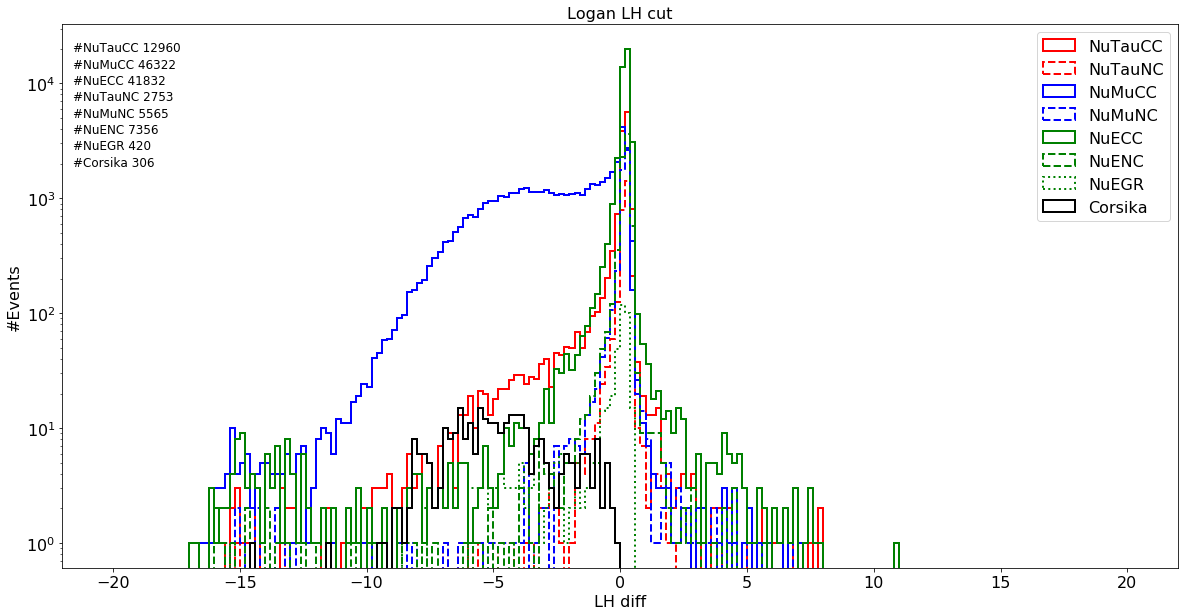

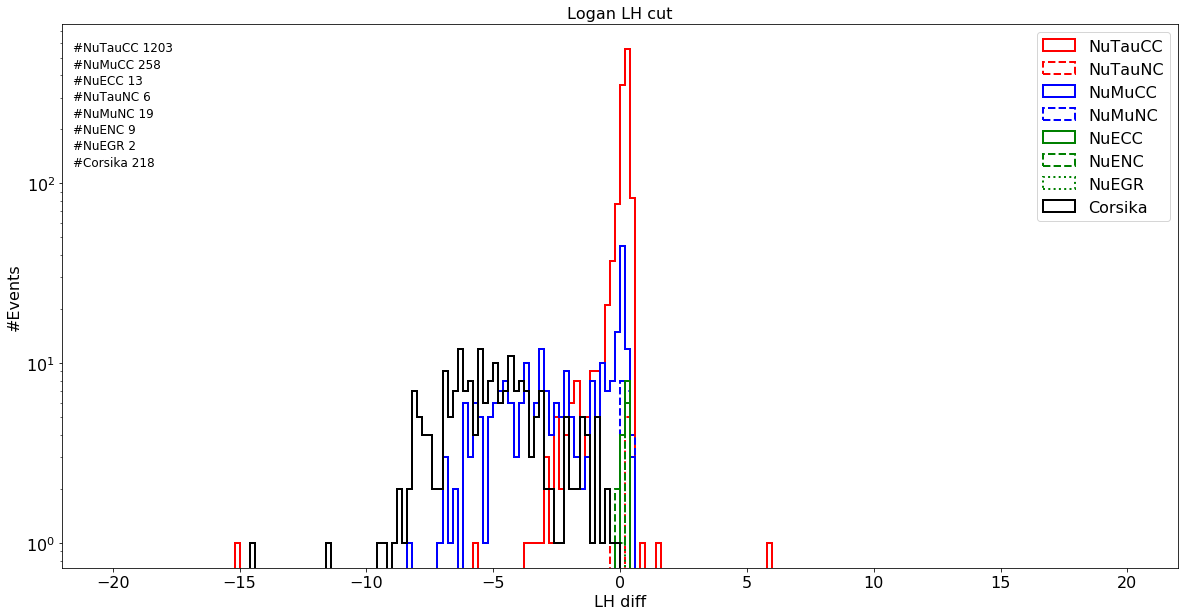

In [21]:
Plot("Logan LH cut", "LH diff",ldata_tc,ldata_tn,ldata_mc,ldata_mn,ldata_ec,ldata_en,ldata_eg,ldata_c,r=[-20,20],loc=1)
Plot("Logan LH cut", "LH diff",ldata_tc[cor_mask_tc],ldata_tn[cor_mask_tn],ldata_mc[cor_mask_mc],ldata_mn[cor_mask_mn],ldata_ec[cor_mask_ec],\
     ldata_en[cor_mask_en],ldata_eg[cor_mask_eg],ldata_c[cor_mask_c],r=[-20,20],loc=1)

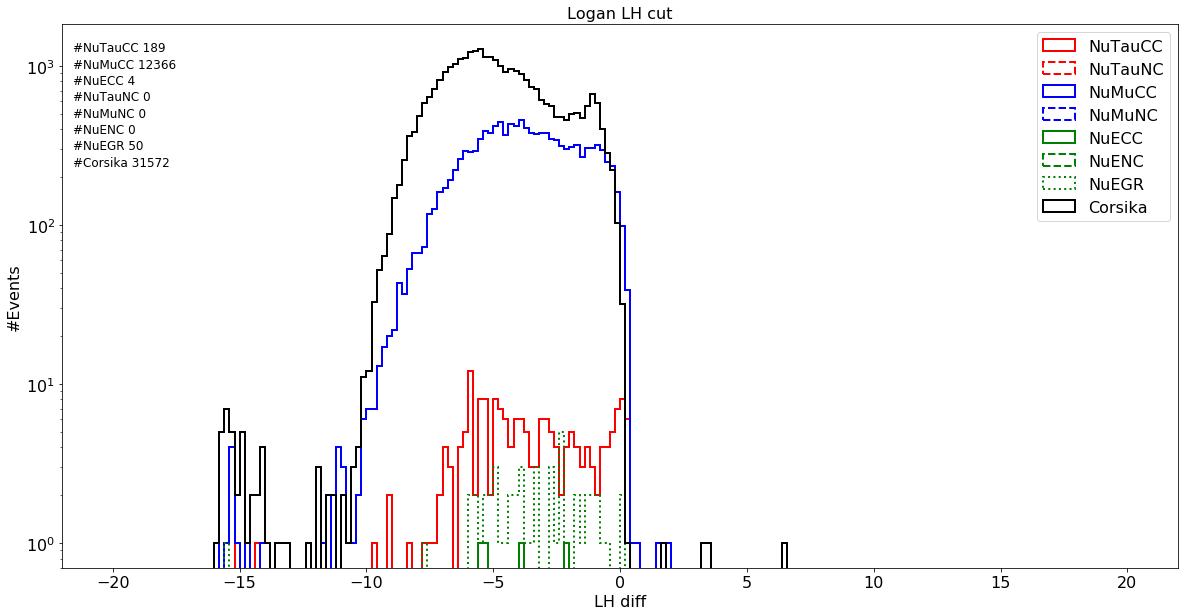

In [75]:
Plot("Logan LH cut", "LH diff",ldata_tc[mask_tc],ldata_tn[mask_tn],ldata_mc[mask_mc],ldata_mn[mask_mn],ldata_ec[mask_ec],\
     ldata_en[mask_en],ldata_eg[mask_eg],ldata_c[mask_c],r=[-20,20],loc=1)

In [76]:
N=3
ddata_tc = np.array([sum(np.sqrt(i[:N])) for i in data_tc['qst_all']['dist']]) 
ddata_tn = np.array([sum(np.sqrt(i[:N])) for i in data_tn['qst_all']['dist']]) 
ddata_mc = np.array([sum(np.sqrt(i[:N])) for i in data_mc['qst_all']['dist']]) 
ddata_mn = np.array([sum(np.sqrt(i[:N])) for i in data_mn['qst_all']['dist']]) 
ddata_ec = np.array([sum(np.sqrt(i[:N])) for i in data_ec['qst_all']['dist']]) 
ddata_en = np.array([sum(np.sqrt(i[:N])) for i in data_en['qst_all']['dist']]) 
ddata_eg = np.array([sum(np.sqrt(i[:N])) for i in data_eg['qst_all']['dist']]) 
ddata_c = np.array([sum(np.sqrt(i[:N])) for i in data_c['qst_all']['dist']]) 

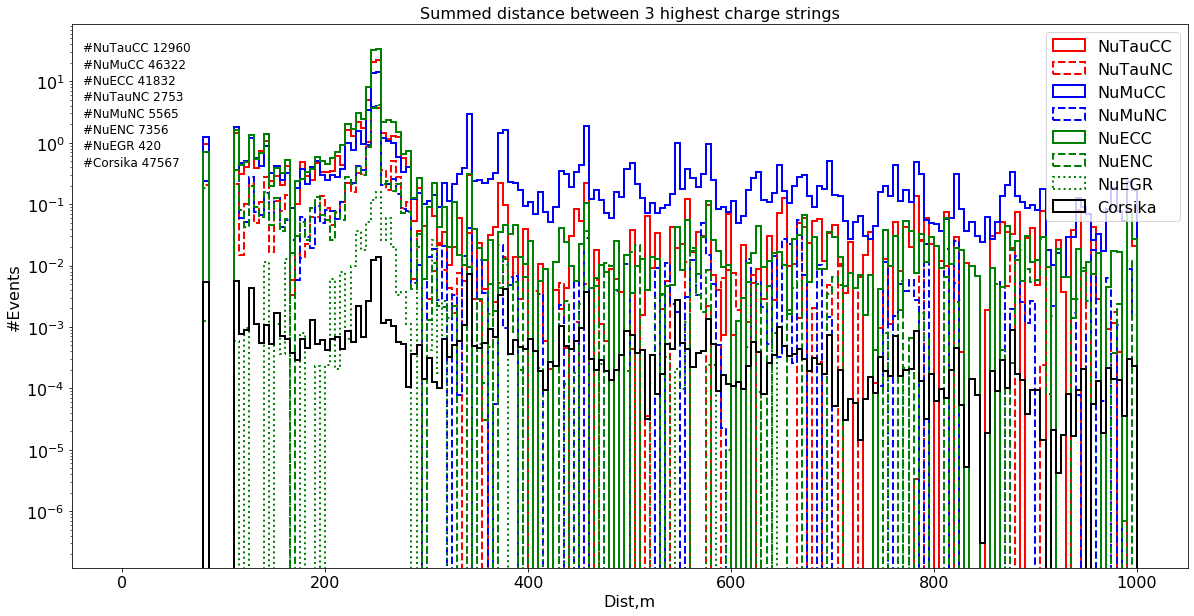

In [77]:
PlotW("Summed distance between {0} highest charge strings".format(N), "Dist,m",ddata_tc,ddata_tn,ddata_mc,ddata_mn,ddata_ec,\
     ddata_en,ddata_eg,ddata_c,data_tc['weight_val'],data_tn['weight_val'],data_mc['weight_val'],data_mn['weight_val'],\
      data_ec['weight_val'],data_en['weight_val'],data_eg['weight_val'],data_c['weight_val'],r=[0,1000],loc=1)

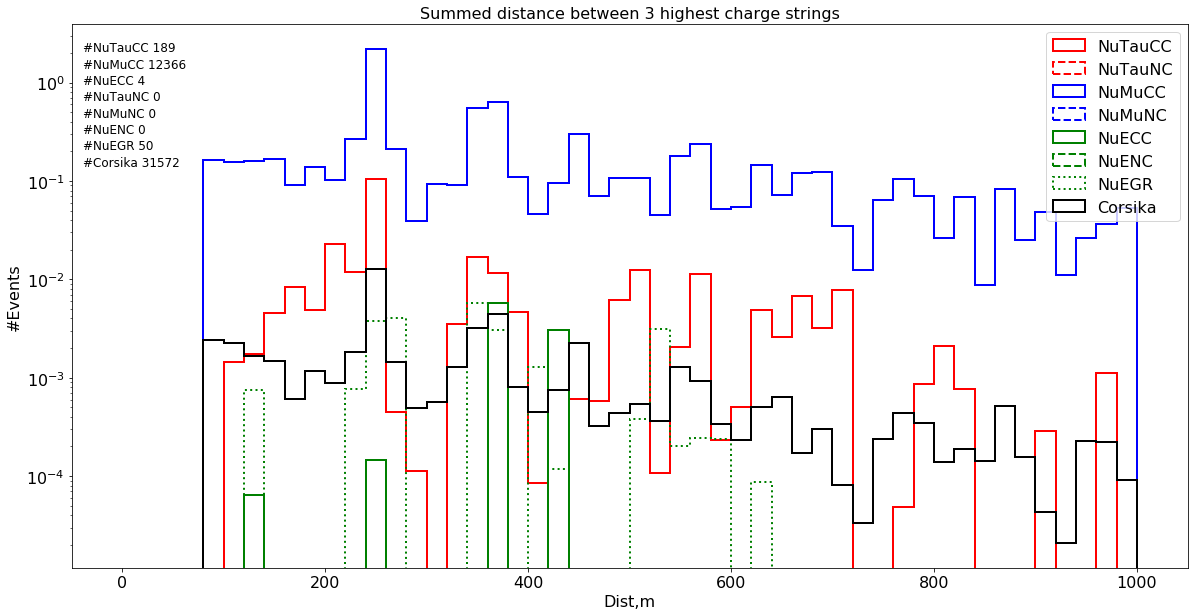

In [78]:
PlotW("Summed distance between {0} highest charge strings".format(N),"Dist,m",ddata_tc[mask_tc],ddata_tn[mask_tn],ddata_mc[mask_mc],\
     ddata_mn[mask_mn],ddata_ec[mask_ec],ddata_en[mask_en],ddata_eg[mask_eg],ddata_c[mask_c],data_tc['weight_val'][mask_tc],\
     data_tn['weight_val'][mask_tn],data_mc['weight_val'][mask_mc],data_mn['weight_val'][mask_mn],data_ec['weight_val'][mask_ec],\
     data_en['weight_val'][mask_en],data_eg['weight_val'][mask_eg],data_c['weight_val'][mask_c],r=[0,1000],b=50,loc=1)

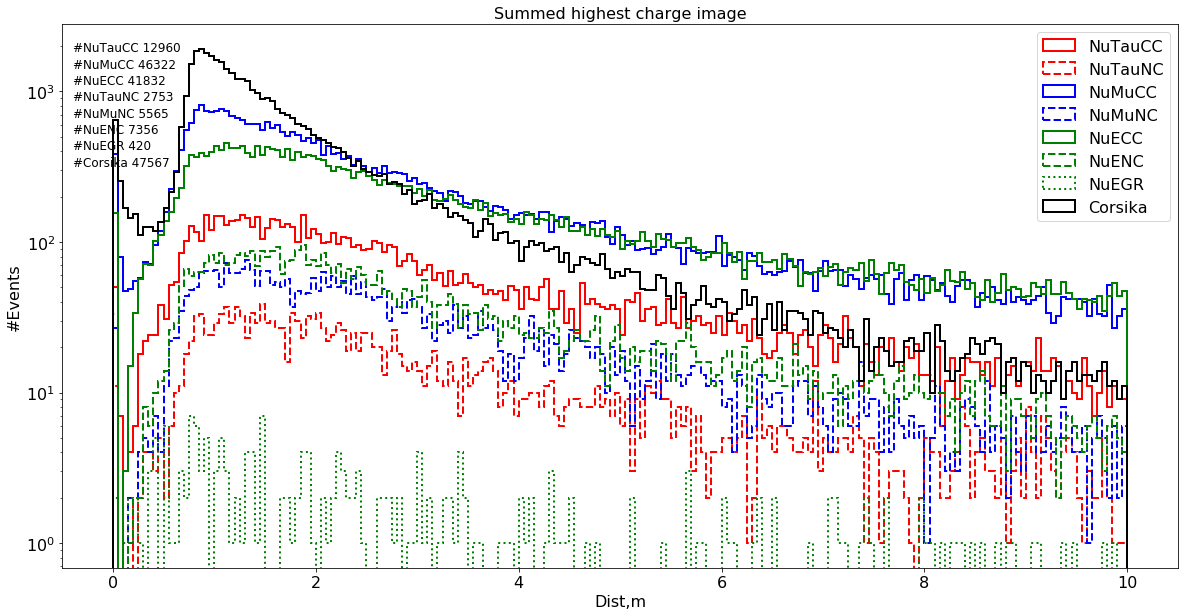

In [122]:
Plot("Summed highest charge image", "Dist,m",data_tc['im_sum'],data_tn['im_sum'],data_mc['im_sum'],data_mn['im_sum'],\
      data_ec['im_sum'],data_en['im_sum'],data_eg['im_sum'],data_c['im_sum'],r=[0,10],loc=1)

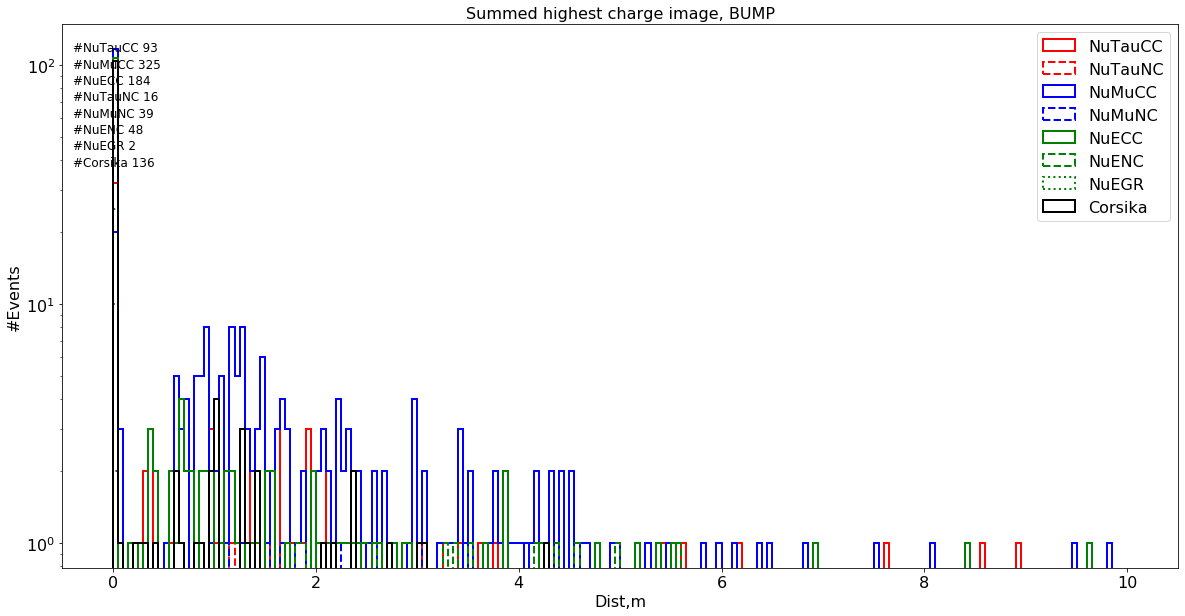

In [181]:
Plot("Summed highest charge image, BUMP", "Dist,m",data_tc['im_sum'][mask_tc],data_tn['im_sum'][mask_tn],data_mc['im_sum'][mask_mc],\
     data_mn['im_sum'][mask_mn],data_ec['im_sum'][mask_ec],data_en['im_sum'][mask_en],data_eg['im_sum'][mask_eg],\
     data_c['im_sum'][mask_c],r=[0,10],loc=1)

In [132]:
np.set_printoptions(precision=3,suppress=True)

print("all", sum(data_tc['im_sum']==0),sum(data_tn['im_sum']==0),sum(data_mc['im_sum']==0),sum(data_mn['im_sum']==0),sum(data_ec['im_sum']==0),\
      sum(data_en['im_sum']==0),sum(data_eg['im_sum']==0),sum(data_c['im_sum']==0))
print("all rel", sum(data_tc['im_sum']==0)/data_tc.shape[0],sum(data_tn['im_sum']==0)/data_tn.shape[0],\
      sum(data_mc['im_sum']==0)/data_mc.shape[0],sum(data_mn['im_sum']==0)/data_mn.shape[0],sum(data_ec['im_sum']==0)/data_ec.shape[0],\
      sum(data_en['im_sum']==0)/data_en.shape[0],sum(data_eg['im_sum']==0)/data_eg.shape[0],sum(data_c['im_sum']==0)/data_c.shape[0])
print("bump", sum(data_tc['im_sum'][mask_tc]==0),sum(data_tn['im_sum'][mask_tn]==0),sum(data_mc['im_sum'][mask_mc]==0),\
      sum(data_mn['im_sum'][mask_mn]==0),sum(data_ec['im_sum'][mask_ec]==0),sum(data_en['im_sum'][mask_en]==0),\
      sum(data_eg['im_sum'][mask_eg]==0),sum(data_c['im_sum'][mask_c]==0))
print("bump rel", sum(data_tc['im_sum'][mask_tc]==0)/data_tc[mask_tc].shape[0],sum(data_tn['im_sum'][mask_tn]==0)/data_tn[mask_tn].shape[0],\
      sum(data_mc['im_sum'][mask_mc]==0)/data_mc[mask_mc].shape[0],sum(data_mn['im_sum'][mask_mn]==0)/data_mn[mask_mn].shape[0],\
      sum(data_ec['im_sum'][mask_ec]==0)/data_ec[mask_ec].shape[0],sum(data_en['im_sum'][mask_en]==0)/data_en[mask_en].shape[0],\
      sum(data_eg['im_sum'][mask_eg]==0)/data_eg[mask_eg].shape[0],sum(data_c['im_sum'][mask_c]==0)/data_c[mask_c].shape[0])
print("bump/all", sum(data_tc['im_sum'][mask_tc]==0)/sum(data_tc['im_sum']==0),sum(data_tn['im_sum'][mask_tn]==0)/sum(data_tn['im_sum']==0),\
      sum(data_mc['im_sum'][mask_mc]==0)/sum(data_mc['im_sum']==0),sum(data_mn['im_sum'][mask_mn]==0)/sum(data_mn['im_sum']==0),\
      sum(data_ec['im_sum'][mask_ec]==0)/sum(data_ec['im_sum']==0),sum(data_en['im_sum'][mask_en]==0)/sum(data_en['im_sum']==0),\
      sum(data_eg['im_sum'][mask_eg]==0)/sum(data_eg['im_sum']==0),sum(data_c['im_sum'][mask_c]==0)/sum(data_c['im_sum']==0))


all 34 8 132 22 106 25 2 153
all rel 0.002623456790123457 0.002905920813657828 0.0028496178921462805 0.003953279424977538 0.0025339453050296423 0.0033985861881457315 0.004761904761904762 0.0032165156516072066
bump 24 7 90 18 91 21 2 77
bump rel 0.25806451612903225 0.4375 0.27692307692307694 0.46153846153846156 0.4945652173913043 0.4375 1.0 0.5661764705882353
bump/all 0.7058823529411765 0.875 0.6818181818181818 0.8181818181818182 0.8584905660377359 0.84 1.0 0.5032679738562091


In [158]:
zmask_tc = data_tc['im_sum']==0
zmask_tn = data_tn['im_sum']==0
zmask_mc = data_mc['im_sum']==0
zmask_mn = data_mn['im_sum']==0 
zmask_ec = data_ec['im_sum']==0 
zmask_en = data_en['im_sum']==0 
zmask_eg = data_eg['im_sum']==0 
zmask_c = data_c['im_sum']==0

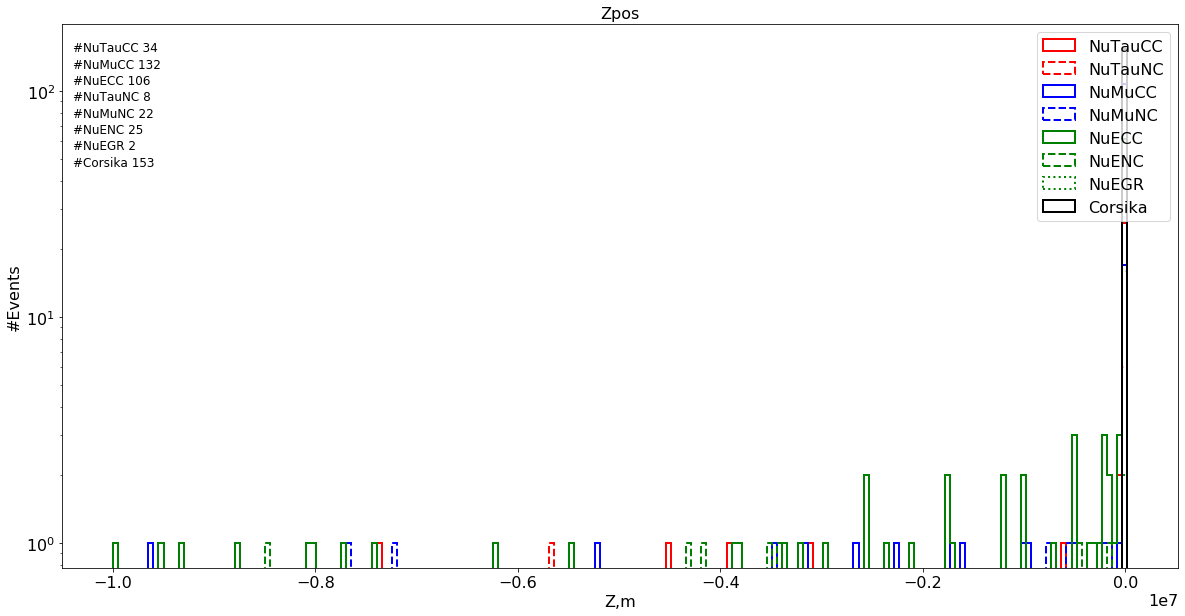

In [206]:
Plot("Zpos", "Z,m",data_tc[zmask_tc]['primary']['position'][:,2],data_tn[zmask_tn]['primary']['position'][:,2],\
     data_mc[zmask_mc]['primary']['position'][:,2],data_mn[zmask_mn]['primary']['position'][:,2],\
     data_ec[zmask_ec]['primary']['position'][:,2],data_en[zmask_en]['primary']['position'][:,2],\
     data_eg[zmask_eg]['primary']['position'][:,2],data_c[zmask_c]['primary']['position'][:,2],r=[-10000000,20000],loc=1)

In [203]:
print(data_tc[zmask_tc]['primary']['position'][:,2])

[     1947.832      1947.52       1947.97       1947.929    -75694.805
 -11675372.         1909.383  -7372212.5      -38585.824      1947.239
  -3933220.2        1947.591      1947.994      1947.519  -4505248.5
      1946.844      1947.196      1947.95       1947.824      1947.505
      1947.924      1947.998      1947.856      1947.852      1947.326
      1947.506      1947.834      1947.205     -1562.281      1947.535
      1947.981  -3132361.      -611836.56       1947.436]


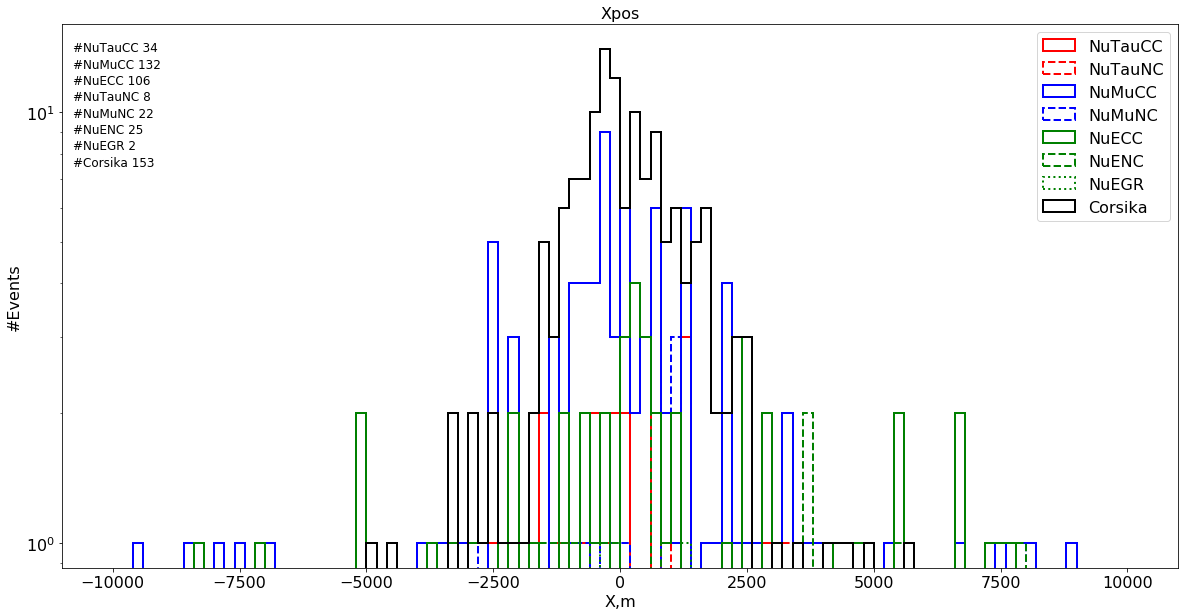

In [197]:
Plot("Xpos", "X,m",data_tc[zmask_tc]['primary']['position'][:,0],data_tn[zmask_tn]['primary']['position'][:,0],\
     data_mc[zmask_mc]['primary']['position'][:,0],data_mn[zmask_mn]['primary']['position'][:,0],\
     data_ec[zmask_ec]['primary']['position'][:,0],data_en[zmask_en]['primary']['position'][:,0],\
     data_eg[zmask_eg]['primary']['position'][:,0],data_c[zmask_c]['primary']['position'][:,0],r=[-10000,10000],b=100,loc=1)

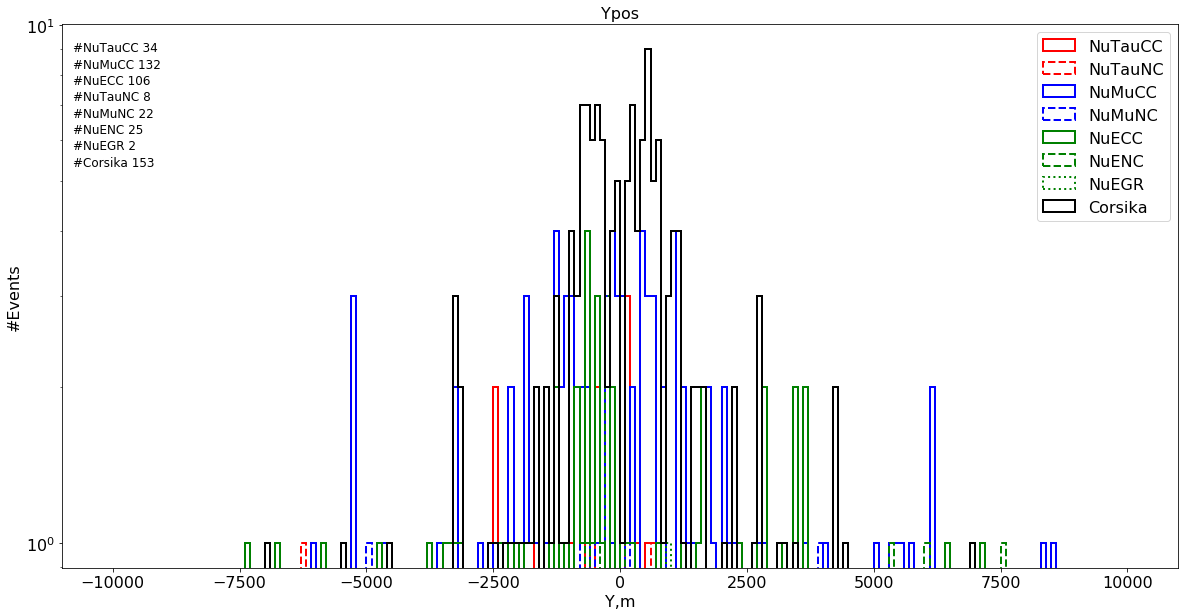

In [196]:
Plot("Ypos", "Y,m",data_tc[zmask_tc]['primary']['position'][:,1],data_tn[zmask_tn]['primary']['position'][:,1],\
     data_mc[zmask_mc]['primary']['position'][:,1],data_mn[zmask_mn]['primary']['position'][:,1],\
     data_ec[zmask_ec]['primary']['position'][:,1],data_en[zmask_en]['primary']['position'][:,1],\
     data_eg[zmask_eg]['primary']['position'][:,1],data_c[zmask_c]['primary']['position'][:,1],r=[-10000,10000],loc=1)

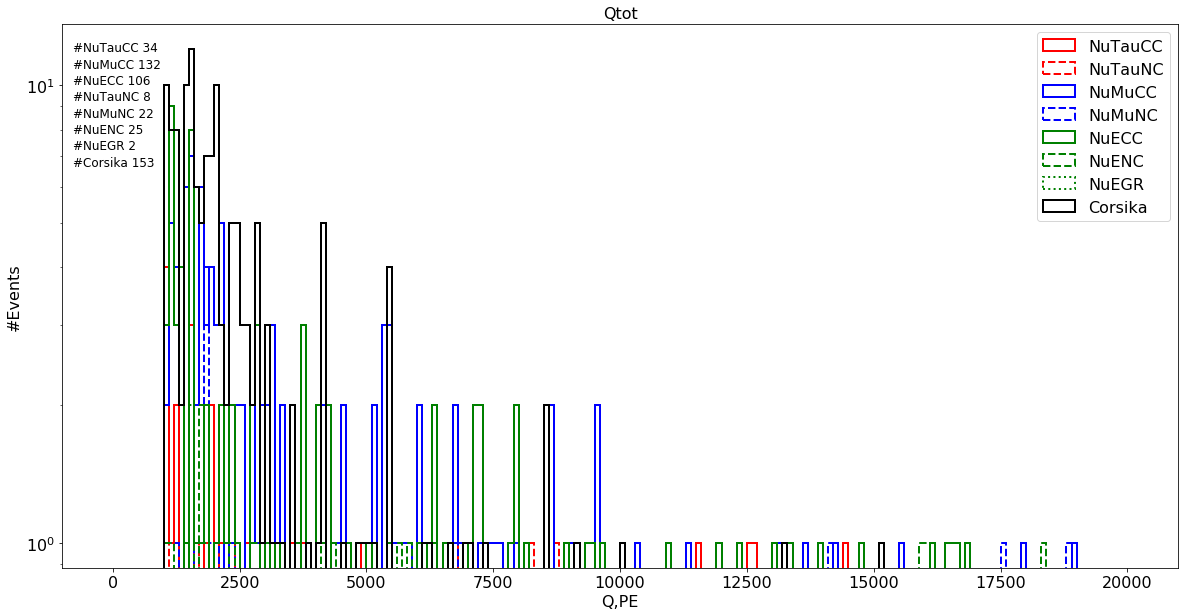

In [195]:
Plot("Qtot", "Q,PE",data_tc[zmask_tc]['qtot'],data_tn[zmask_tn]['qtot'],data_mc[zmask_mc]['qtot'],\
     data_mn[zmask_mn]['qtot'],data_ec[zmask_ec]['qtot'],data_en[zmask_en]['qtot'],\
     data_eg[zmask_eg]['qtot'],data_c[zmask_c]['qtot'],r=[0,20000],loc=1)

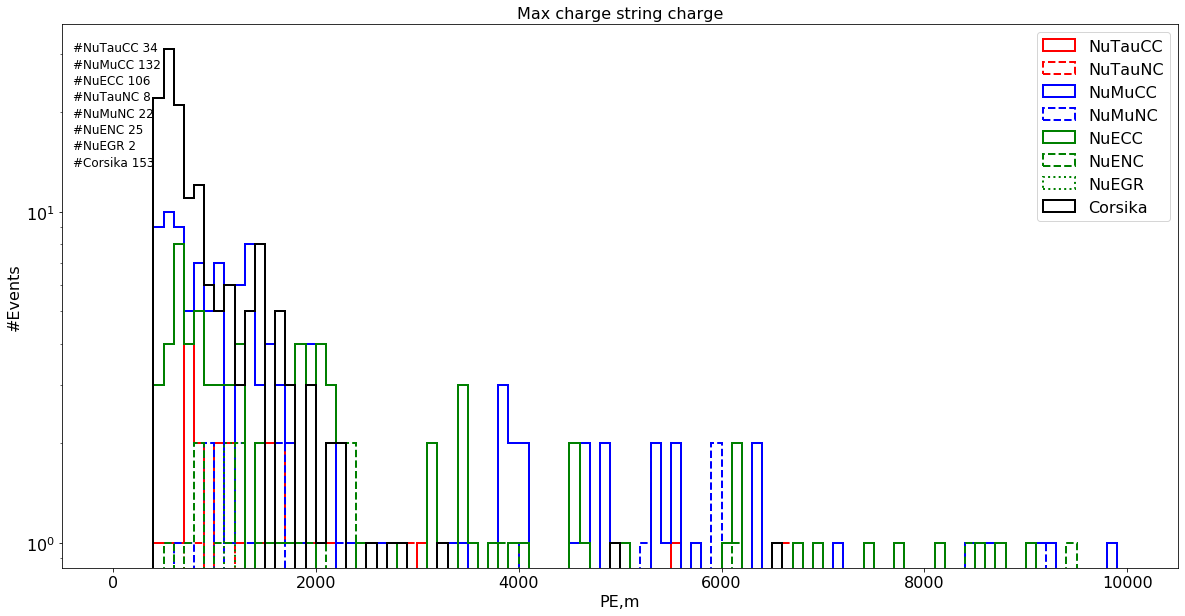

In [240]:
Plot("Max charge string charge", "PE,m",data_tc[zmask_tc]['qst']['q'][:,0],data_tn[zmask_tn]['qst']['q'][:,0],\
     data_mc[zmask_mc]['qst']['q'][:,0],data_mn[zmask_mn]['qst']['q'][:,0],data_ec[zmask_ec]['qst']['q'][:,0],\
     data_en[zmask_en]['qst']['q'][:,0],data_eg[zmask_eg]['qst']['q'][:,0],data_c[zmask_c]['qst']['q'][:,0],r=[0,10000],b=100,loc=1)

In [237]:
print(data_tc[zmask_tc]['qst']['q'][:,0])

[ 1615.85   1937.65   1781.55   7485.275   723.95   1586.075  2161.675
  1149.925   791.7   10737.375  2672.875  1016.6    2083.4     886.175
  1777.35   1495.475   784.925  4038.325  1516.3    6711.575  3083.275
   526.325   828.45   1262.    40599.1    5540.55    701.475  9863.925
  1002.25  10867.35   6548.525   440.425  1103.625   629.2  ]


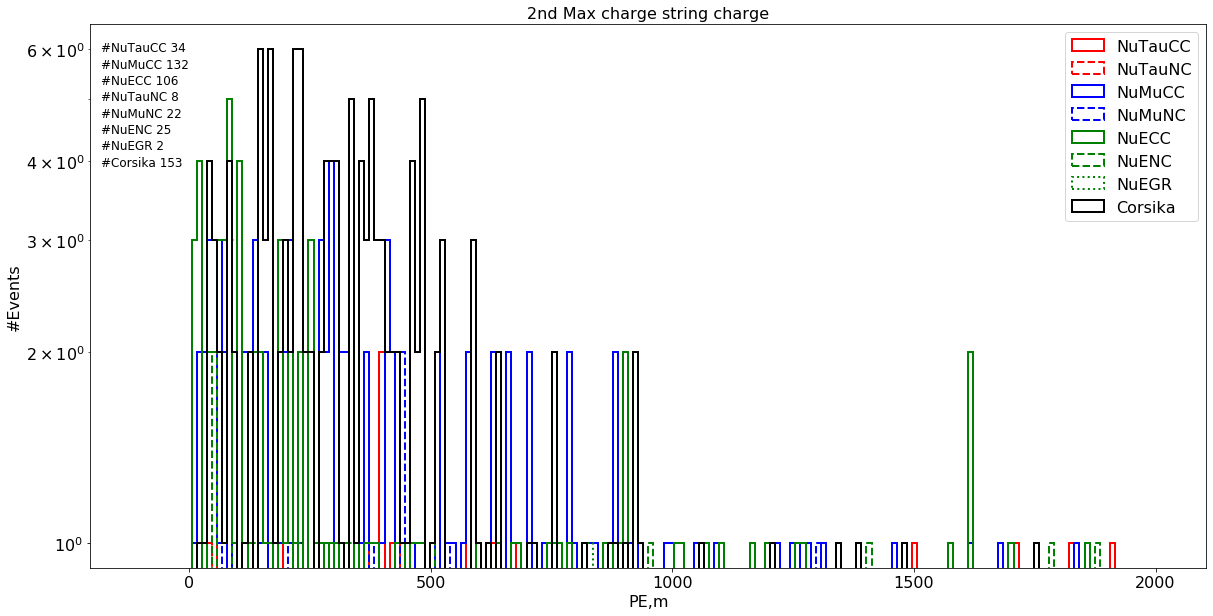

In [234]:
Plot("2nd Max charge string charge", "PE,m",data_tc[zmask_tc]['qst']['q'][:,1],data_tn[zmask_tn]['qst']['q'][:,1],\
     data_mc[zmask_mc]['qst']['q'][:,1],data_mn[zmask_mn]['qst']['q'][:,1],data_ec[zmask_ec]['qst']['q'][:,1],\
     data_en[zmask_en]['qst']['q'][:,1],data_eg[zmask_eg]['qst']['q'][:,1],data_c[zmask_c]['qst']['q'][:,1],r=[-100,2000],b=200,loc=1)

In [238]:
print(data_tc[zmask_tc]['qst']['q'][:,1])

[  787.325  1910.025   395.225   205.875    76.5      66.9     126.35
    27.575   745.35   2077.775  1709.825   246.4    1824.725    28.575
   626.275   117.6     568.925  3545.625   199.175  2336.55    237.775
   432.975   154.375   183.225 15977.925  1505.7     422.975   669.1
   232.55    371.475    73.125   394.575   155.425   145.15 ]


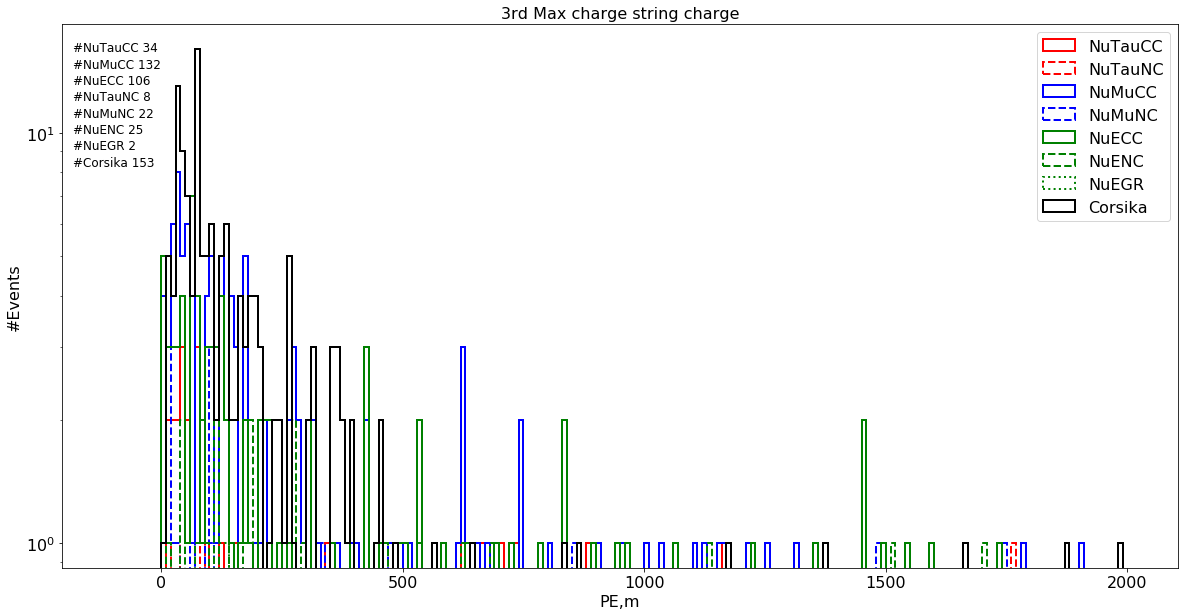

In [231]:
Plot("3rd Max charge string charge", "PE,m",data_tc[zmask_tc]['qst']['q'][:,2],data_tn[zmask_tn]['qst']['q'][:,2],\
     data_mc[zmask_mc]['qst']['q'][:,2],data_mn[zmask_mn]['qst']['q'][:,2],data_ec[zmask_ec]['qst']['q'][:,2],\
     data_en[zmask_en]['qst']['q'][:,2],data_eg[zmask_eg]['qst']['q'][:,2],data_c[zmask_c]['qst']['q'][:,2],r=[-100,2000],b=210,loc=1)

In [239]:
print(data_tc[zmask_tc]['qst']['q'][:,2])

[ 368.225  708.2     58.175  125.225   42.9     64.325   72.175   19.075
  537.3    881.125  732.925   35.575  322.725   23.075  278.025   84.95
  241.85  3195.75    24.8   1160.225   36.975   43.125   41.675   19.625
 5800.25   610.175   54.6    516.125  154.8    347.45    71.225  193.475
   71.325   92.1  ]


In [209]:
print(data_tc[zmask_tc]['prim_daughter']['pdg'])

[         15 -2000001006 -2000001006 -2000001006         -15         -16
         -15 -2000001006          15          15         -15          15
         -15          15 -2000001006 -2000001006 -2000001006          15
          15          15         -15         -15 -2000001006         -15
 -2000001006 -2000001006          15 -2000001006         -15         -15
         -15 -2000001006          15 -2000001006]


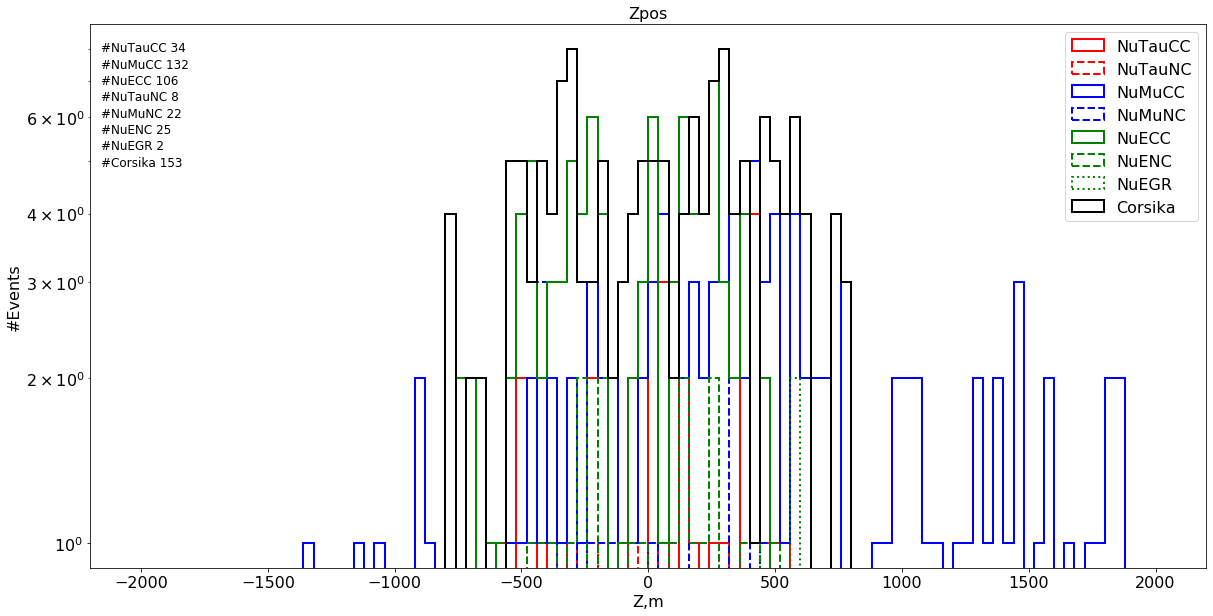

In [216]:
Plot("Zpos", "Z,m",data_tc[zmask_tc]['prim_daughter']['position'][:,2],data_tn[zmask_tn]['prim_daughter']['position'][:,2],\
     data_mc[zmask_mc]['prim_daughter']['position'][:,2],data_mn[zmask_mn]['prim_daughter']['position'][:,2],\
     data_ec[zmask_ec]['prim_daughter']['position'][:,2],data_en[zmask_en]['prim_daughter']['position'][:,2],\
     data_eg[zmask_eg]['prim_daughter']['position'][:,2],data_c[zmask_c]['prim_daughter']['position'][:,2],r=[-2000,2000],b=100,loc=1)

In [207]:
print(data_tc[zmask_tc]['prim_daughter']['position'][:,2])

[      76.796      178.498      -25.882      125.37      -215.026
 -9334896.        -170.906     -237.924     -630.732      433.924
     -465.81        65.346      530.038     -296.549     -319.776
      432.188     -581.845      292.307      388.645      448.082
      378.538      -46.251      416.414      439.518      275.145
     -396.784       -2.681     -196.675     -490.464     -263.597
      482.494     -512.388      135.056       64.526]


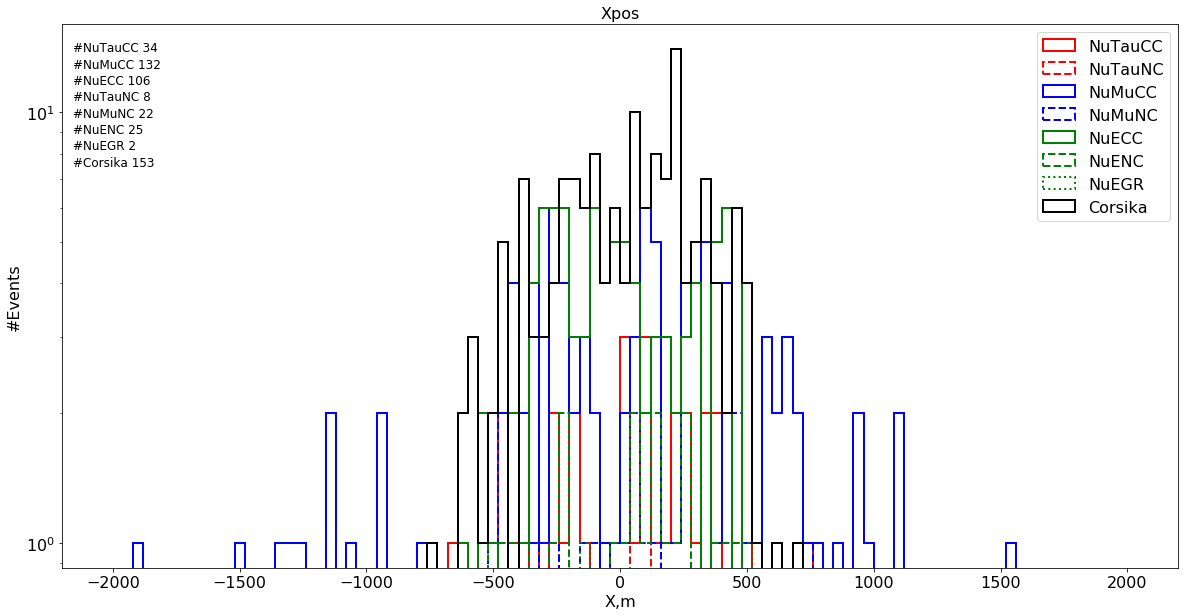

In [212]:
Plot("Xpos", "X,m",data_tc[zmask_tc]['prim_daughter']['position'][:,0],data_tn[zmask_tn]['prim_daughter']['position'][:,0],\
     data_mc[zmask_mc]['prim_daughter']['position'][:,0],data_mn[zmask_mn]['prim_daughter']['position'][:,0],\
     data_ec[zmask_ec]['prim_daughter']['position'][:,0],data_en[zmask_en]['prim_daughter']['position'][:,0],\
     data_eg[zmask_eg]['prim_daughter']['position'][:,0],data_c[zmask_c]['prim_daughter']['position'][:,0],r=[-2000,2000],b=100,loc=1)

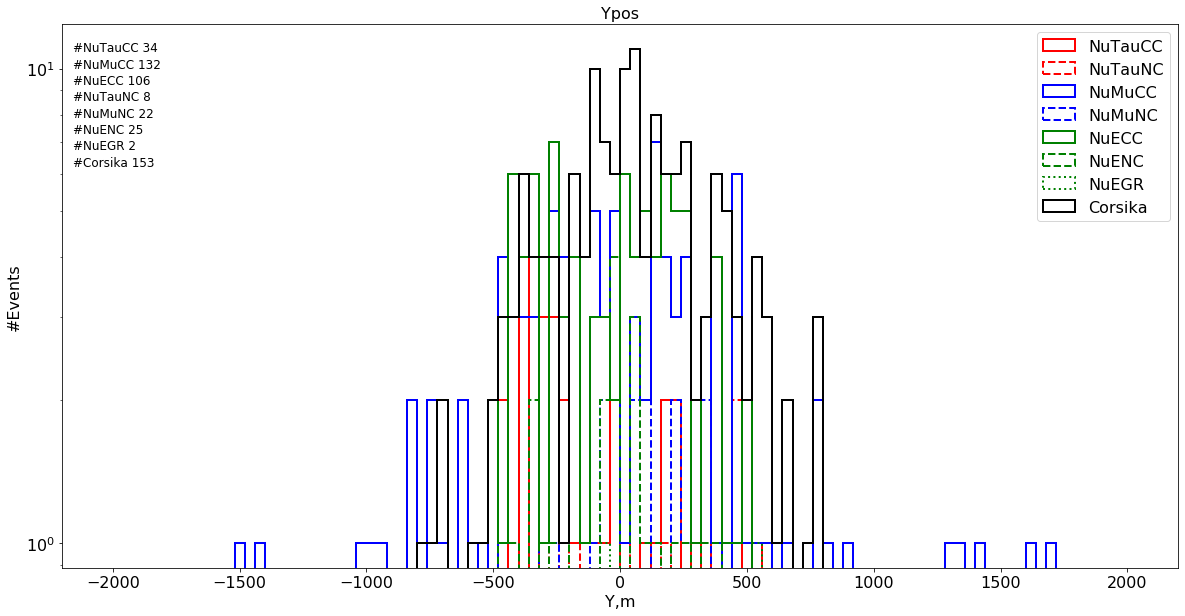

In [214]:
Plot("Ypos", "Y,m",data_tc[zmask_tc]['prim_daughter']['position'][:,1],data_tn[zmask_tn]['prim_daughter']['position'][:,1],\
     data_mc[zmask_mc]['prim_daughter']['position'][:,1],data_mn[zmask_mn]['prim_daughter']['position'][:,1],\
     data_ec[zmask_ec]['prim_daughter']['position'][:,1],data_en[zmask_en]['prim_daughter']['position'][:,1],\
     data_eg[zmask_eg]['prim_daughter']['position'][:,1],data_c[zmask_c]['prim_daughter']['position'][:,1],r=[-2000,2000],b=100,loc=1)

In [85]:
N=3
dcut =300
dmask_tc = np.array([sum(np.sqrt(i[:N])) for i in data_tc['qst_all']['dist']]) <= dcut
dmask_tn = np.array([sum(np.sqrt(i[:N])) for i in data_tn['qst_all']['dist']]) <= dcut 
dmask_mc = np.array([sum(np.sqrt(i[:N])) for i in data_mc['qst_all']['dist']]) <= dcut 
dmask_mn = np.array([sum(np.sqrt(i[:N])) for i in data_mn['qst_all']['dist']]) <= dcut 
dmask_ec = np.array([sum(np.sqrt(i[:N])) for i in data_ec['qst_all']['dist']]) <= dcut 
dmask_en = np.array([sum(np.sqrt(i[:N])) for i in data_en['qst_all']['dist']]) <= dcut 
dmask_eg = np.array([sum(np.sqrt(i[:N])) for i in data_eg['qst_all']['dist']]) <= dcut 
dmask_c = np.array([sum(np.sqrt(i[:N])) for i in data_c['qst_all']['dist']]) <= dcut 

In [86]:
nmask_tc = cor_mask_tc & dmask_tc
nmask_tn = cor_mask_tn & dmask_tn
nmask_mc = cor_mask_mc & dmask_mc
nmask_mn = cor_mask_mn & dmask_mn
nmask_ec = cor_mask_ec & dmask_ec
nmask_en = cor_mask_en & dmask_en
nmask_eg = cor_mask_eg & dmask_eg
nmask_c = cor_mask_c & dmask_c

In [87]:
GetRatesM("Rates Bottom right corner and dist cut",nmask_tc,nmask_tn,nmask_mc,nmask_mn,nmask_ec,nmask_en,nmask_eg,nmask_c)

Rates Bottom right corner and dist cut
Total = 3.891 +/- 0.161
Single = 0.010 +/- 0.004
Double = 0.160 +/- 0.034
Track =  3.721 +/- 0.123
NuTauCC = 0.160 +/- 0.034
NuTauNC = 0.000 +/- 0.000
NuMuCC =  3.694 +/- 0.122
NuMuNC =  0.000 +/- 0.000
NuECC =   0.000 +/- 0.000
NuENC =   0.000 +/- 0.000
NuEGR =   0.009 +/- 0.003
Corsika =  0.027 +/- 0.001


In [38]:
lcut = -0.05
lmask_tc = (data_tc['logan_veto']["SPE_rlogl"]-data_tc['logan_veto']["Cascade_rlogl"])>lcut
lmask_tn = (data_tn['logan_veto']["SPE_rlogl"]-data_tn['logan_veto']["Cascade_rlogl"])>lcut
lmask_mc = (data_mc['logan_veto']["SPE_rlogl"]-data_mc['logan_veto']["Cascade_rlogl"])>lcut
lmask_mn = (data_mn['logan_veto']["SPE_rlogl"]-data_mn['logan_veto']["Cascade_rlogl"])>lcut
lmask_ec = (data_ec['logan_veto']["SPE_rlogl"]-data_ec['logan_veto']["Cascade_rlogl"])>lcut
lmask_en = (data_en['logan_veto']["SPE_rlogl"]-data_en['logan_veto']["Cascade_rlogl"])>lcut
lmask_eg = (data_eg['logan_veto']["SPE_rlogl"]-data_eg['logan_veto']["Cascade_rlogl"])>lcut
lmask_c = (data_c['logan_veto']["SPE_rlogl"]-data_c['logan_veto']["Cascade_rlogl"])>lcut

/home/dup193/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in greater
  


In [88]:
cut1=0.99
cut2=0.8
mask_tc = (data_tc['preds']["n1"] >= cut1) & (data_tc['preds']["n3"] >= cut2)
mask_tn = (data_tn['preds']["n1"] >= cut1) & (data_tn['preds']["n3"] >= cut2)
mask_mc = (data_mc['preds']["n1"] >= cut1) & (data_mc['preds']["n3"] >= cut2)
mask_mn = (data_mn['preds']["n1"] >= cut1) & (data_mn['preds']["n3"] >= cut2)
mask_ec = (data_ec['preds']["n1"] >= cut1) & (data_ec['preds']["n3"] >= cut2)
mask_en = (data_en['preds']["n1"] >= cut1) & (data_en['preds']["n3"] >= cut2)
mask_eg = (data_eg['preds']["n1"] >= cut1) & (data_eg['preds']["n3"] >= cut2)
mask_c = (data_c['preds']["n1"] >= cut1) & (data_c['preds']["n3"] >= cut2)

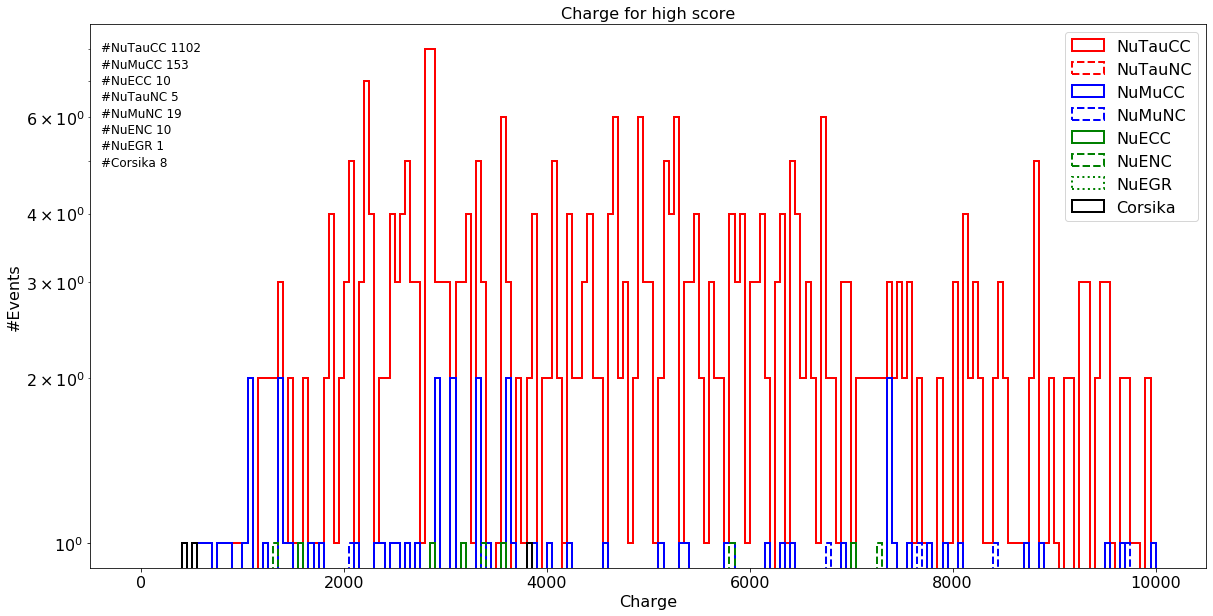

In [89]:
Plot("Charge for high score","Charge",data_tc['qst']['q'][:,0][mask_tc],data_tn['qst']['q'][:,0][mask_tn],data_mc['qst']['q'][:,0][mask_mc],\
     data_mn['qst']['q'][:,0][mask_mn],data_ec['qst']['q'][:,0][mask_ec],data_en['qst']['q'][:,0][mask_en],data_eg['qst']['q'][:,0][mask_eg],\
     data_c['qst']['q'][:,0][mask_c],r=[0,10000],loc=1)

In [90]:
cut1=0.5
cut2=0.6
mask_tc = (cut1 <= data_tc['preds']["n1"]) & (data_tc['preds']["n1"] <= cut2) & (cut1 <= data_tc['preds']["n4"]) & (data_tc['preds']["n4"] <= cut2)
mask_tn = (cut1 <= data_tn['preds']["n1"]) & (data_tn['preds']["n1"] <= cut2) & (cut1 <= data_tn['preds']["n4"]) & (data_tn['preds']["n4"] <= cut2)
mask_mc = (cut1 <= data_mc['preds']["n1"]) & (data_mc['preds']["n1"] <= cut2) & (cut1 <= data_mc['preds']["n4"]) & (data_mc['preds']["n4"] <= cut2)
mask_mn = (cut1 <= data_mn['preds']["n1"]) & (data_mn['preds']["n1"] <= cut2) & (cut1 <= data_mn['preds']["n4"]) & (data_mn['preds']["n4"] <= cut2)
mask_ec = (cut1 <= data_ec['preds']["n1"]) & (data_ec['preds']["n1"] <= cut2) & (cut1 <= data_ec['preds']["n4"]) & (data_ec['preds']["n4"] <= cut2)
mask_en = (cut1 <= data_en['preds']["n1"]) & (data_en['preds']["n1"] <= cut2) & (cut1 <= data_en['preds']["n4"]) & (data_en['preds']["n4"] <= cut2)
mask_eg = (cut1 <= data_eg['preds']["n1"]) & (data_eg['preds']["n1"] <= cut2) & (cut1 <= data_eg['preds']["n4"]) & (data_eg['preds']["n4"] <= cut2)
mask_c = (cut1 <= data_c['preds']["n1"]) & (data_c['preds']["n1"] <= cut2) & (cut1 <= data_c['preds']["n4"]) & (data_c['preds']["n4"] <= cut2)

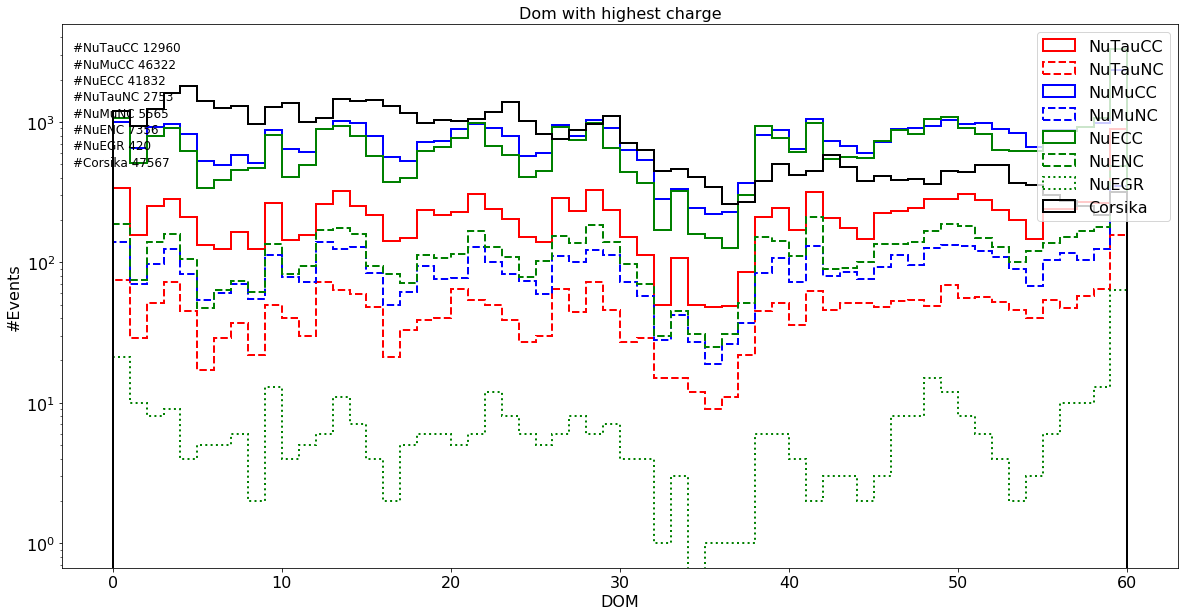

In [93]:
Plot("Dom with highest charge".format(N), "DOM",data_tc['dom'],data_tn['dom'],data_mc['dom'],data_mn['dom'],data_ec['dom'],\
     data_en['dom'],data_eg['dom'],data_c['dom'],r=[0,60],loc=1,b=60)

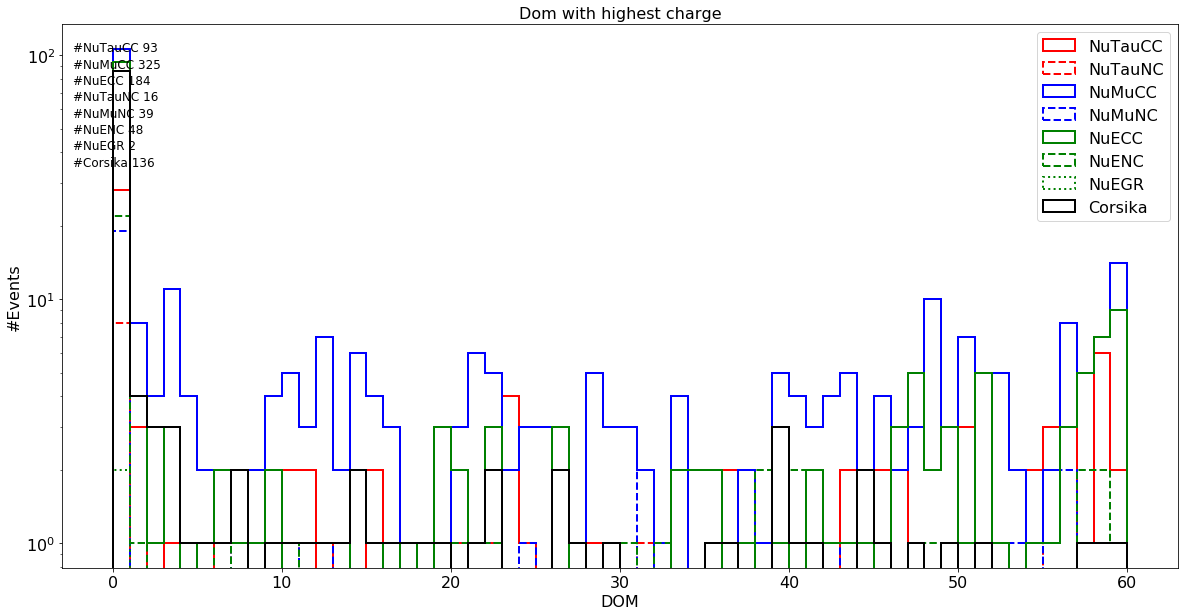

In [94]:
Plot("Dom with highest charge".format(N), "DOM",data_tc['dom'][mask_tc],data_tn['dom'][mask_tn],data_mc['dom'][mask_mc],\
      data_mn['dom'][mask_mn],data_ec['dom'][mask_ec],data_en['dom'][mask_en],data_eg['dom'][mask_eg],data_c['dom'][mask_c],r=[0,60],b=60,loc=1)

In [29]:
print(data_tc['out_st'][:,0])

[1 0 1 ... 0 1 1]


In [95]:
np.set_printoptions(precision=3,suppress=True)
print("Percent of Hishest charge string being on the edge")
print("NuTauCC", np.unique(data_tc['out_st'][:,0], return_counts=True)[1]/data_tc.shape[0])
print("NuTauNC", np.unique(data_tn['out_st'][:,0], return_counts=True)[1]/data_tn.shape[0])
print("NuMuCC", np.unique(data_mc['out_st'][:,0], return_counts=True)[1]/data_mc.shape[0])
print("NuMuNC", np.unique(data_mn['out_st'][:,0], return_counts=True)[1]/data_mn.shape[0])
print("NuECC", np.unique(data_ec['out_st'][:,0], return_counts=True)[1]/data_ec.shape[0])
print("NuENC", np.unique(data_en['out_st'][:,0], return_counts=True)[1]/data_en.shape[0])
print("NuEGR", np.unique(data_eg['out_st'][:,0], return_counts=True)[1]/data_eg.shape[0])
print("Corsika", np.unique(data_c['out_st'][:,0], return_counts=True)[1]/data_c.shape[0])

Percent of Hishest charge string being on the edge
NuTauCC [0.595 0.405]
NuTauNC [0.625 0.375]
NuMuCC [0.591 0.409]
NuMuNC [0.613 0.387]
NuECC [0.569 0.431]
NuENC [0.591 0.409]
NuEGR [0.464 0.536]
Corsika [0.661 0.339]


In [96]:
print("Percent of Hishest charge string being on the edge, Bump")
print("NuTauCC", np.unique(data_tc['out_st'][:,0][mask_tc], return_counts=True)[1]/data_tc[mask_tc].shape[0])
print("NuTauNC", np.unique(data_tn['out_st'][:,0][mask_tn], return_counts=True)[1]/data_tn[mask_tn].shape[0])
print("NuMuCC", np.unique(data_mc['out_st'][:,0][mask_mc], return_counts=True)[1]/data_mc[mask_mc].shape[0])
print("NuMuNC", np.unique(data_mn['out_st'][:,0][mask_mn], return_counts=True)[1]/data_mn[mask_mn].shape[0])
print("NuECC", np.unique(data_ec['out_st'][:,0][mask_ec], return_counts=True)[1]/data_ec[mask_ec].shape[0])
print("NuENC", np.unique(data_en['out_st'][:,0][mask_en], return_counts=True)[1]/data_en[mask_en].shape[0])
print("NuEGR", np.unique(data_eg['out_st'][:,0][mask_eg], return_counts=True)[1]/data_eg[mask_eg].shape[0])
print("Corsika", np.unique(data_c['out_st'][:,0][mask_c], return_counts=True)[1]/data_c[mask_c].shape[0])

Percent of Hishest charge string being on the edge, Bump
NuTauCC [0.602 0.398]
NuTauNC [0.75 0.25]
NuMuCC [0.582 0.418]
NuMuNC [0.641 0.359]
NuECC [0.625 0.375]
NuENC [0.688 0.312]
NuEGR [1.]
Corsika [0.676 0.324]


In [101]:
print("Percent of 3 hishest charge string being on the edge")
print("NuTauCC", np.unique(data_tc['out_st'][:,1], return_counts=True)[1]/data_tc.shape[0])
print("NuTauNC", np.unique(data_tn['out_st'][:,1], return_counts=True)[1]/data_tn.shape[0])
print("NuMuCC", np.unique(data_mc['out_st'][:,1], return_counts=True)[1]/data_mc.shape[0])
print("NuMuNC", np.unique(data_mn['out_st'][:,1], return_counts=True)[1]/data_mn.shape[0])
print("NuECC", np.unique(data_ec['out_st'][:,1], return_counts=True)[1]/data_ec.shape[0])
print("NuENC", np.unique(data_en['out_st'][:,1], return_counts=True)[1]/data_en.shape[0])
print("NuEGR", np.unique(data_eg['out_st'][:,1], return_counts=True)[1]/data_eg.shape[0])
print("Corsika", np.unique(data_c['out_st'][:,1], return_counts=True)[1]/data_c.shape[0])

Percent of 3 hishest charge string being on the edge
NuTauCC [0.452 0.131 0.301 0.116]
NuTauNC [0.484 0.129 0.3   0.087]
NuMuCC [0.436 0.161 0.284 0.119]
NuMuNC [0.468 0.134 0.289 0.109]
NuECC [0.43  0.128 0.315 0.127]
NuENC [0.451 0.134 0.306 0.108]
NuEGR [0.355 0.126 0.305 0.214]
Corsika [0.49  0.205 0.215 0.089]


In [102]:
print("Percent of 3 hishest charge string being on the edge, Bump")
print("NuTauCC", np.unique(data_tc['out_st'][:,1][mask_tc], return_counts=True)[1]/data_tc[mask_tc].shape[0])
print("NuTauNC", np.unique(data_tn['out_st'][:,1][mask_tn], return_counts=True)[1]/data_tn[mask_tn].shape[0])
print("NuMuCC", np.unique(data_mc['out_st'][:,1][mask_mc], return_counts=True)[1]/data_mc[mask_mc].shape[0])
print("NuMuNC", np.unique(data_mn['out_st'][:,1][mask_mn], return_counts=True)[1]/data_mn[mask_mn].shape[0])
print("NuECC", np.unique(data_ec['out_st'][:,1][mask_ec], return_counts=True)[1]/data_ec[mask_ec].shape[0])
print("NuENC", np.unique(data_en['out_st'][:,1][mask_en], return_counts=True)[1]/data_en[mask_en].shape[0])
print("NuEGR", np.unique(data_eg['out_st'][:,1][mask_eg], return_counts=True)[1]/data_eg[mask_eg].shape[0])
print("Corsika", np.unique(data_c['out_st'][:,1][mask_c], return_counts=True)[1]/data_c[mask_c].shape[0])

Percent of 3 hishest charge string being on the edge, Bump
NuTauCC [0.473 0.097 0.258 0.172]
NuTauNC [0.625 0.125 0.188 0.062]
NuMuCC [0.446 0.111 0.335 0.108]
NuMuNC [0.513 0.128 0.256 0.103]
NuECC [0.522 0.092 0.239 0.147]
NuENC [0.625 0.083 0.25  0.042]
NuEGR [1.]
Corsika [0.515 0.221 0.191 0.074]


In [103]:
print("Percent of 10 Hishest charge string being on the edge")
print("NuTauCC", np.unique(data_tc['out_st'][:,2], return_counts=True)[1]/data_tc.shape[0])
print("NuTauNC", np.unique(data_tn['out_st'][:,2], return_counts=True)[1]/data_tn.shape[0])
print("NuMuCC", np.unique(data_mc['out_st'][:,2], return_counts=True)[1]/data_mc.shape[0])
print("NuMuNC", np.unique(data_mn['out_st'][:,2], return_counts=True)[1]/data_mn.shape[0])
print("NuECC", np.unique(data_ec['out_st'][:,2], return_counts=True)[1]/data_ec.shape[0])
print("NuENC", np.unique(data_en['out_st'][:,2], return_counts=True)[1]/data_en.shape[0])
print("NuEGR", np.unique(data_eg['out_st'][:,2], return_counts=True)[1]/data_eg.shape[0])
print("Corsika", np.unique(data_c['out_st'][:,2], return_counts=True)[1]/data_c.shape[0])

Percent of 10 Hishest charge string being on the edge
NuTauCC [0.23  0.073 0.091 0.129 0.218 0.189 0.059 0.009 0.001 0.   ]
NuTauNC [0.269 0.07  0.095 0.12  0.21  0.171 0.057 0.007 0.002]
NuMuCC [0.142 0.124 0.151 0.149 0.161 0.141 0.083 0.04  0.009 0.   ]
NuMuNC [0.252 0.064 0.091 0.134 0.22  0.182 0.049 0.008 0.   ]
NuECC [0.224 0.063 0.083 0.125 0.23  0.208 0.06  0.007 0.   ]
NuENC [0.233 0.067 0.089 0.134 0.228 0.184 0.056 0.008 0.001]
NuEGR [0.16  0.067 0.071 0.107 0.2   0.252 0.112 0.021 0.01 ]
Corsika [0.157 0.167 0.187 0.15  0.124 0.099 0.072 0.037 0.006 0.   ]


In [105]:
print("Percent of 10 Hishest charge string being on the edge, Bump")
print("NuTauCC", np.unique(data_tc['out_st'][:,2][mask_tc], return_counts=True)[1]/data_tc[mask_tc].shape[0])
print("NuTauNC", np.unique(data_tn['out_st'][:,2][mask_tn], return_counts=True)[1]/data_tn[mask_tn].shape[0])
print("NuMuCC", np.unique(data_mc['out_st'][:,2][mask_mc], return_counts=True)[1]/data_mc[mask_mc].shape[0])
print("NuMuNC", np.unique(data_mn['out_st'][:,2][mask_mn], return_counts=True)[1]/data_mn[mask_mn].shape[0])
print("NuECC", np.unique(data_ec['out_st'][:,2][mask_ec], return_counts=True)[1]/data_ec[mask_ec].shape[0])
print("NuENC", np.unique(data_en['out_st'][:,2][mask_en], return_counts=True)[1]/data_en[mask_en].shape[0])
print("NuEGR", np.unique(data_eg['out_st'][:,2][mask_eg], return_counts=True)[1]/data_eg[mask_eg].shape[0])
print("Corsika", np.unique(data_c['out_st'][:,2][mask_c], return_counts=True)[1]/data_c[mask_c].shape[0])

Percent of 10 Hishest charge string being on the edge, Bump
NuTauCC [0.312 0.065 0.097 0.075 0.129 0.194 0.097 0.032]
NuTauNC [0.375 0.062 0.125 0.125 0.062 0.25 ]
NuMuCC [0.172 0.114 0.138 0.138 0.175 0.166 0.068 0.015 0.012]
NuMuNC [0.308 0.026 0.103 0.128 0.256 0.077 0.103]
NuECC [0.261 0.071 0.12  0.125 0.201 0.141 0.076 0.005]
NuENC [0.375 0.125 0.125 0.104 0.125 0.125 0.021]
NuEGR [0.5 0.5]
Corsika [0.132 0.147 0.25  0.14  0.125 0.118 0.051 0.022 0.015]


In [31]:
for i, im in enumerate(data_mc['image'][mask_mc][:100]):
    fig = plt.figure(figsize=(15, 5))
    ax1 = fig.add_subplot(131)
    ax1.imshow(im[0][:,:,0], interpolation='nearest', aspect='auto', cmap= 'gray')
    ax2 = fig.add_subplot(132)
    ax2.imshow(im[0][:,:,1], interpolation='nearest', aspect='auto', cmap= 'gray')
    ax3 = fig.add_subplot(133)
    ax3.imshow(im[0][:,:,2], interpolation='nearest', aspect='auto', cmap= 'gray')
    print(data['primary'][i],data['qtot'][i])

ValueError: no field of name image